In [1]:
from calcTF import *

/bgfs/alee/chelsea/apps/anaconda3/envs/py37/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
print(pyscenic.__path__, pyscenic.__version__)
print(dask.__path__, dask.__version__)

['/bgfs/alee/chelsea/apps/anaconda3/envs/py37/lib/python3.7/site-packages/pyscenic'] 0.9.19
['/bgfs/alee/chelsea/apps/anaconda3/envs/py37/lib/python3.7/site-packages/dask'] 1.0.0


In [3]:
!ls ../data/scVelo 

AL1.h5ad	   AL1_ref_raw.h5ad   CellCycleAdataDict.pkl
AL1_ref_norm.h5ad  CellAdataDict.pkl  CycleGene_PearsonCorrDict.pkl


- v3: 

```python
db = [RankingDatabase(fname='../data/pySCENIC/ref/hg38__refseq-r80__10kb_up_and_down_tss.mc9nr.feather', name='hg38__refseq-r80__10kb_up_and_down_tss.mc9nr')]
tf_names = load_tf_names('../data/pySCENIC/ref/hs_hgnc_curated_tfs.txt')

CellTypes = ['T47D WT','T47D KO',  'MCF7','MM134','SUM44','BCK4', 'MCF10A','HEK293'] 
adata_raw = sc.read('../data/scVelo/AL1_ref_raw.h5ad')
adata_m = sc.read('../data/scVelo/AL1.h5ad')
if np.all(adata_raw.obs_names == adata_m.obs_names):
    adata_raw.obs = adata_m.obs

for cell in CellTypes:
    
    tmp = adata_raw[adata_raw.obs['CellType'] == cell]
    sc.pp.filter_genes(tmp, min_cells=1)
    
    RawSplicedCts = pd.DataFrame(tmp.X.toarray(), index=tmp.obs.index, columns=tmp.var.index) # cell X gene
    print(cell, RawSplicedCts.shape)
    
    if not isfile('{}/{}_auc_mtx.csv'.format('../data/pySCENIC', cell)):      
        calcTFs(RawSplicedCts, tf_names, db, cell, ppn=12)
        print('calculating TF for %s'%(cell))
        ```

AnnData object with n_obs × n_vars = 4614 × 33538 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'


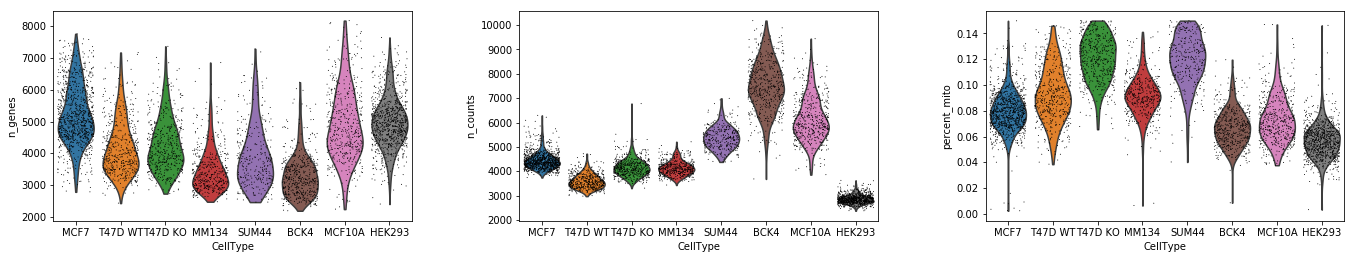

In [4]:
adata_raw = sc.read('../data/scVelo/AL1_ref_raw.h5ad')
# sc.pp.filter_genes(adata_raw, min_cells=1)
print(adata_raw)

adata_m = sc.read('../data/scVelo/AL1.h5ad')
if np.all(adata_raw.obs_names == adata_m.obs_names):
    adata_raw.obs = adata_m.obs

sc.pl.violin(adata_raw, ['n_genes', 'n_counts', 'percent_mito'], groupby='CellType',
             jitter=0.4, multi_panel=True)

In [7]:
adata_raw = sc.read('../data/scVelo/AL1_ref_raw.h5ad')
adata_m = sc.read('../data/scVelo/AL1.h5ad')
if np.all(adata_raw.obs_names == adata_m.obs_names):
    adata_raw.obs = adata_m.obs

CellTypes = ['T47D WT','T47D KO',  'MCF7','MM134','SUM44','BCK4', 'MCF10A','HEK293'] 
for cell in CellTypes:
    
    tmp = adata_raw[adata_raw.obs['CellType']==cell]
    sc.pp.filter_genes(tmp, min_cells=2)
    
    print(cell, tmp,'\n') 

Trying to set attribute `.var` of view, making a copy.
Trying to set attribute `.var` of view, making a copy.


T47D WT AnnData object with n_obs × n_vars = 509 × 15424 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 

T47D KO AnnData object with n_obs × n_vars = 491 × 15373 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 



Trying to set attribute `.var` of view, making a copy.
Trying to set attribute `.var` of view, making a copy.
Trying to set attribute `.var` of view, making a copy.


MCF7 AnnData object with n_obs × n_vars = 977 × 17626 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 

MM134 AnnData object with n_obs × n_vars = 439 × 14832 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 



Trying to set attribute `.var` of view, making a copy.
Trying to set attribute `.var` of view, making a copy.


SUM44 AnnData object with n_obs × n_vars = 314 × 14374 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 

BCK4 AnnData object with n_obs × n_vars = 512 × 14853 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 



Trying to set attribute `.var` of view, making a copy.


MCF10A AnnData object with n_obs × n_vars = 491 × 16467 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 

HEK293 AnnData object with n_obs × n_vars = 881 × 18097 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced' 



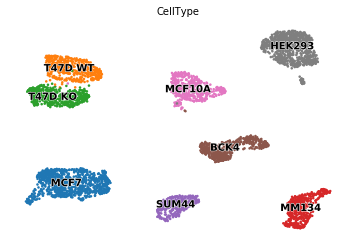

In [6]:
scv.pl.scatter(adata_m, color='CellType')

In [ ]:
db = [RankingDatabase(fname='../data/pySCENIC/ref/hg38__refseq-r80__10kb_up_and_down_tss.mc9nr.feather', name='hg38__refseq-r80__10kb_up_and_down_tss.mc9nr')]
tf_names = load_tf_names('../data/pySCENIC/ref/hs_hgnc_curated_tfs.txt')

CellTypes = ['T47D WT','T47D KO',  'MCF7','MM134','SUM44','BCK4', 'MCF10A','HEK293'] 
adata_raw = sc.read('../data/scVelo/AL1_ref_raw.h5ad')
adata_m = sc.read('../data/scVelo/AL1.h5ad')
if np.all(adata_raw.obs_names == adata_m.obs_names):
    adata_raw.obs = adata_m.obs

for cell in CellTypes:
    
    tmp = adata_raw[adata_raw.obs['CellType'] == cell]
    sc.pp.filter_genes(tmp, min_cells=2)
    
    RawSplicedCts = pd.DataFrame(tmp.X.toarray(), index=tmp.obs.index, columns=tmp.var.index) # cell X gene
    print(cell, RawSplicedCts.shape)
    
    if not isfile('{}/{}_auc_mtx.csv'.format('../data/pySCENIC', cell)):      
        calcTFs(RawSplicedCts, tf_names, db, cell, ppn=12)
        print('calculating TF for %s'%(cell))
        

Trying to set attribute `.var` of view, making a copy.


T47D WT (509, 15424)
preparing dask client
parsing input
creating dask graph
4 partitions
computing dask graph


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


shutting down client and local cluster



2020-02-07 20:58:44,547 - pyscenic.utils - INFO - Calculating Pearson correlations.

2020-02-07 20:58:44,549 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [False].


finished



2020-02-07 20:59:57,589 - pyscenic.utils - INFO - Creating modules.


[                                        ] | 0% Completed | 26.6s


2020-02-07 21:03:06,115 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HOXC8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 29.9s


2020-02-07 21:03:09,413 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HSF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 30.6s


2020-02-07 21:03:10,181 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for IKZF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 33.3s


2020-02-07 21:03:12,888 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TFEB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 34.9s


2020-02-07 21:03:14,418 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 40.3s


2020-02-07 21:03:19,696 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF141 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 40.5s


2020-02-07 21:03:20,033 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF746 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 40.8s


2020-02-07 21:03:20,400 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 42.7s


2020-02-07 21:03:22,169 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RFX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 46.5s


2020-02-07 21:03:25,930 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 47.8s


2020-02-07 21:03:27,336 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 48.7s


2020-02-07 21:03:28,158 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF600 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 49.6s


2020-02-07 21:03:29,158 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF189 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 51.3s


2020-02-07 21:03:30,850 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 52.0s


2020-02-07 21:03:31,473 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for BARX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 52.1s


2020-02-07 21:03:31,583 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RUNX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 52.3s


2020-02-07 21:03:31,771 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for BARX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 52.7s


2020-02-07 21:03:32,250 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF781 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 53.2s


2020-02-07 21:03:32,711 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 53.6s


2020-02-07 21:03:33,085 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF208 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 54.2s


2020-02-07 21:03:33,654 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 55.7s


2020-02-07 21:03:35,145 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 56.4s


2020-02-07 21:03:35,835 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF627 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 57.2s


2020-02-07 21:03:36,783 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 57.3s


2020-02-07 21:03:36,895 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 59.9s


2020-02-07 21:03:39,403 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  0.8s


2020-02-07 21:03:40,338 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SIM2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  3.2s


2020-02-07 21:03:42,716 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXJ2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  6.5s


2020-02-07 21:03:45,943 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  7.9s


2020-02-07 21:03:47,353 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for BARX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  8.1s


2020-02-07 21:03:47,581 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 13.8s


2020-02-07 21:03:53,241 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 14.1s


2020-02-07 21:03:53,640 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for IKZF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 23.4s


2020-02-07 21:04:02,856 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for IRF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 25.9s


2020-02-07 21:04:05,349 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ISL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 28.7s


2020-02-07 21:04:08,256 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 31.5s


2020-02-07 21:04:10,890 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RUNX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 37.2s


2020-02-07 21:04:16,689 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR2E3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 43.1s


2020-02-07 21:04:22,578 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 43.2s


2020-02-07 21:04:22,720 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HAND1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 43.7s


2020-02-07 21:04:23,180 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HDX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 44.5s


2020-02-07 21:04:23,890 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 47.5s


2020-02-07 21:04:26,967 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HAND1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 49.4s


2020-02-07 21:04:28,900 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NKX3-1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 49.5s


2020-02-07 21:04:28,922 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HDX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 53.6s


2020-02-07 21:04:33,084 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HKR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 54.2s


2020-02-07 21:04:33,742 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR2C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 55.2s


2020-02-07 21:04:34,637 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PAX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 59.8s


2020-02-07 21:04:39,276 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HNF4G could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  2min  1.5s


2020-02-07 21:04:40,966 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR2F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  2min  7.4s


2020-02-07 21:04:46,874 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HOXC8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  2min  8.2s


2020-02-07 21:04:47,649 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 7% Completed |  2min  8.3s


2020-02-07 21:04:47,864 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB26 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 7% Completed |  2min  8.6s


2020-02-07 21:04:48,098 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:04:48,149 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HNF4G could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 11.4s


2020-02-07 21:04:50,866 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 11.7s


2020-02-07 21:04:51,113 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 13.0s


2020-02-07 21:04:52,539 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF189 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 13.7s


2020-02-07 21:04:53,143 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 13.9s


2020-02-07 21:04:53,322 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 9% Completed |  2min 15.4s


2020-02-07 21:04:54,861 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF208 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 11% Completed |  2min 19.2s


2020-02-07 21:04:58,752 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB17 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 12% Completed |  2min 20.8s


2020-02-07 21:05:00,399 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF394 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 12% Completed |  2min 21.8s


2020-02-07 21:05:01,365 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 23.5s


2020-02-07 21:05:03,020 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TCF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 24.0s


2020-02-07 21:05:03,491 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB46 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 24.1s


2020-02-07 21:05:03,577 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for STAT5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 24.2s


2020-02-07 21:05:03,666 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 24.3s


2020-02-07 21:05:03,768 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF605 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 24.4s


2020-02-07 21:05:03,960 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 25.7s


2020-02-07 21:05:05,208 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP69 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 26.1s


2020-02-07 21:05:05,619 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF263 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 13% Completed |  2min 26.2s


2020-02-07 21:05:05,744 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 26.6s


2020-02-07 21:05:06,064 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 26.7s


2020-02-07 21:05:06,308 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MKX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 28.5s


2020-02-07 21:05:07,969 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF616 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 28.8s


2020-02-07 21:05:08,213 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 29.0s


2020-02-07 21:05:08,380 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 29.1s


2020-02-07 21:05:08,582 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF782 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 29.5s


2020-02-07 21:05:08,995 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 29.8s


2020-02-07 21:05:09,280 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 30.1s


2020-02-07 21:05:09,574 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZKSCAN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 30.8s


2020-02-07 21:05:10,193 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 30.9s


2020-02-07 21:05:10,350 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 31.2s


2020-02-07 21:05:10,697 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:05:10,730 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF493 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 31.4s


2020-02-07 21:05:10,858 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF646 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 31.8s


2020-02-07 21:05:11,348 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TCF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 34.3s


2020-02-07 21:05:13,810 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF529 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 34.9s


2020-02-07 21:05:14,525 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 36.1s


2020-02-07 21:05:15,627 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF880 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 37.3s


2020-02-07 21:05:16,763 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 15% Completed |  2min 38.3s


2020-02-07 21:05:17,762 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZIC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 15% Completed |  2min 38.9s


2020-02-07 21:05:18,465 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF546 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 39.1s


2020-02-07 21:05:18,736 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF319 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 39.2s


2020-02-07 21:05:18,930 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 40.8s


2020-02-07 21:05:20,391 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF565 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 45.7s


2020-02-07 21:05:25,216 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF746 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 47.1s


2020-02-07 21:05:26,622 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ARID3A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 49.8s


2020-02-07 21:05:29,337 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 49.9s


2020-02-07 21:05:29,518 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF763 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########                                ] | 20% Completed |  2min 51.4s


2020-02-07 21:05:30,947 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########                                ] | 21% Completed |  2min 52.4s


2020-02-07 21:05:31,894 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF776 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########                                ] | 21% Completed |  2min 52.6s


2020-02-07 21:05:32,082 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TFEB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  2min 59.2s


2020-02-07 21:05:38,749 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  2min 59.6s


2020-02-07 21:05:39,017 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SOX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 27% Completed |  2min 59.9s


2020-02-07 21:05:39,516 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF212 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 27% Completed |  3min  0.6s


2020-02-07 21:05:40,030 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB46 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  1.5s


2020-02-07 21:05:40,993 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR2F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  2.0s


2020-02-07 21:05:41,521 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  2.6s


2020-02-07 21:05:42,047 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TLX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  3.2s


2020-02-07 21:05:42,719 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  4.3s


2020-02-07 21:05:43,734 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP69B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  4.4s


2020-02-07 21:05:43,896 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  5.9s


2020-02-07 21:05:45,311 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF460 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  6.0s


2020-02-07 21:05:45,511 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZKSCAN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  6.3s


2020-02-07 21:05:45,790 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:05:45,806 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF251 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  6.8s


2020-02-07 21:05:46,335 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  6.9s


2020-02-07 21:05:46,450 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  7.3s


2020-02-07 21:05:46,766 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min  7.5s


2020-02-07 21:05:46,979 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF263 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:05:47,049 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min  7.9s


2020-02-07 21:05:47,401 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for BARX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min  8.0s


2020-02-07 21:05:47,547 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for GMEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min  8.5s


2020-02-07 21:05:47,889 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF497 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min  9.6s


2020-02-07 21:05:49,052 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF516 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:05:49,092 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF141 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 11.3s


2020-02-07 21:05:50,842 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 11.9s


2020-02-07 21:05:51,368 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF280B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 12.4s


2020-02-07 21:05:51,881 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF646 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 13.5s


2020-02-07 21:05:52,928 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 13.7s


2020-02-07 21:05:53,092 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 13.8s


2020-02-07 21:05:53,301 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 14.0s


2020-02-07 21:05:53,479 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 14.5s


2020-02-07 21:05:53,952 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF546 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 15.1s


2020-02-07 21:05:54,510 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 15.5s


2020-02-07 21:05:54,990 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HAND1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:05:55,003 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 29% Completed |  3min 16.7s


2020-02-07 21:05:56,226 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF208 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 17.8s


2020-02-07 21:05:57,245 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF324B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 33% Completed |  3min 20.2s


2020-02-07 21:05:59,779 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HDX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 33% Completed |  3min 20.7s


2020-02-07 21:06:00,161 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF600 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 33% Completed |  3min 20.8s


2020-02-07 21:06:00,311 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF605 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 26.0s


2020-02-07 21:06:05,510 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZXDA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 26.2s


2020-02-07 21:06:05,750 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF746 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 26.5s


2020-02-07 21:06:06,006 - pyscenic.transform - WARNING - Less than 80% of the genes in ADNP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 26.7s


2020-02-07 21:06:06,196 - pyscenic.transform - WARNING - Less than 80% of the genes in AEBP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 27.1s


2020-02-07 21:06:06,533 - pyscenic.transform - WARNING - Less than 80% of the genes in CXXC1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:06,545 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF763 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:06,566 - pyscenic.transform - WARNING - Less than 80% of the genes in AHR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 27.2s


2020-02-07 21:06:06,721 - pyscenic.transform - WARNING - Less than 80% of the genes in ALX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 27.3s


2020-02-07 21:06:06,741 - pyscenic.transform - WARNING - Less than 80% of the genes in DBP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 27.4s


2020-02-07 21:06:06,872 - pyscenic.transform - WARNING - Less than 80% of the genes in HINFP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 27.5s


2020-02-07 21:06:07,017 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 27.7s


2020-02-07 21:06:07,219 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 27.8s


2020-02-07 21:06:07,342 - pyscenic.transform - WARNING - Less than 80% of the genes in HKR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 28.0s


2020-02-07 21:06:07,518 - pyscenic.transform - WARNING - Less than 80% of the genes in HLF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 28.4s


2020-02-07 21:06:07,881 - pyscenic.transform - WARNING - Less than 80% of the genes in HMG20A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 28.5s


2020-02-07 21:06:07,955 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF354C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 28.7s


2020-02-07 21:06:08,262 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF776 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 28.8s


2020-02-07 21:06:08,335 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 29.1s


2020-02-07 21:06:08,557 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 30.5s


2020-02-07 21:06:09,927 - pyscenic.transform - WARNING - Less than 80% of the genes in HNF4G could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 30.8s


2020-02-07 21:06:10,252 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:10,278 - pyscenic.transform - WARNING - Less than 80% of the genes in DEAF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 31.0s


2020-02-07 21:06:10,469 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNTL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 31.3s


2020-02-07 21:06:10,780 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 31.6s


2020-02-07 21:06:11,119 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 32.0s


2020-02-07 21:06:11,430 - pyscenic.transform - WARNING - Less than 80% of the genes in DMBX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 32.2s


2020-02-07 21:06:11,635 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA13 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 32.3s


2020-02-07 21:06:11,805 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 32.6s


2020-02-07 21:06:12,148 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF782 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 33.1s


2020-02-07 21:06:12,553 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 34.8s


2020-02-07 21:06:14,208 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HKR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 35.6s


2020-02-07 21:06:15,114 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF394 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:15,157 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 36.8s


2020-02-07 21:06:16,361 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF415 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 36.9s


2020-02-07 21:06:16,392 - pyscenic.transform - WARNING - Less than 80% of the genes in MNT could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 37.0s


2020-02-07 21:06:16,514 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 38.2s


2020-02-07 21:06:17,681 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for E2F5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 38.3s


2020-02-07 21:06:17,905 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 38.8s


2020-02-07 21:06:18,357 - pyscenic.transform - WARNING - Less than 80% of the genes in ATF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 39.9s


2020-02-07 21:06:19,405 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for EN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 40.3s


2020-02-07 21:06:19,814 - pyscenic.transform - WARNING - Less than 80% of the genes in MTF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 41.7s


2020-02-07 21:06:21,124 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 42.0s


2020-02-07 21:06:21,441 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 42.2s


2020-02-07 21:06:21,711 - pyscenic.transform - WARNING - Less than 80% of the genes in BACH2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 42.5s


2020-02-07 21:06:21,992 - pyscenic.transform - WARNING - Less than 80% of the genes in BARX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 42.8s


2020-02-07 21:06:22,312 - pyscenic.transform - WARNING - Less than 80% of the genes in BARX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 43.2s


2020-02-07 21:06:22,725 - pyscenic.transform - WARNING - Less than 80% of the genes in E2F4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 43.5s


2020-02-07 21:06:22,883 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:22,960 - pyscenic.transform - WARNING - Less than 80% of the genes in E2F5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 43.9s


2020-02-07 21:06:23,318 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 44.1s


2020-02-07 21:06:23,553 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 44.2s


2020-02-07 21:06:23,741 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 44.3s


2020-02-07 21:06:23,784 - pyscenic.transform - WARNING - Less than 80% of the genes in BATF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 44.6s


2020-02-07 21:06:24,061 - pyscenic.transform - WARNING - Less than 80% of the genes in BBX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 44.7s


2020-02-07 21:06:24,245 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 44.8s


2020-02-07 21:06:24,260 - pyscenic.transform - WARNING - Less than 80% of the genes in BCL6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:24,313 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:24,350 - pyscenic.transform - WARNING - Less than 80% of the genes in E2F6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 45.0s


2020-02-07 21:06:24,433 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PRDM6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:24,486 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 45.3s


2020-02-07 21:06:24,809 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAPC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 45.5s


2020-02-07 21:06:24,983 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAPC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 45.8s


2020-02-07 21:06:25,318 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX13 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 46.0s


2020-02-07 21:06:25,512 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 46.1s


2020-02-07 21:06:25,622 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TCF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 46.7s


2020-02-07 21:06:26,149 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 46.8s


2020-02-07 21:06:26,389 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 48.1s


2020-02-07 21:06:27,591 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXD8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 48.5s


2020-02-07 21:06:28,029 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MAFK could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:28,077 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 48.8s


2020-02-07 21:06:28,186 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:28,269 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 49.0s


2020-02-07 21:06:28,466 - pyscenic.transform - WARNING - Less than 80% of the genes in SP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 49.1s


2020-02-07 21:06:28,518 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 49.2s


2020-02-07 21:06:28,660 - pyscenic.transform - WARNING - Less than 80% of the genes in INSM1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 50.6s


2020-02-07 21:06:30,056 - pyscenic.transform - WARNING - Less than 80% of the genes in SP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 51.3s


2020-02-07 21:06:30,768 - pyscenic.transform - WARNING - Less than 80% of the genes in E4F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 52.5s


2020-02-07 21:06:31,990 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:32,064 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:32,076 - pyscenic.transform - WARNING - Less than 80% of the genes in MYCN could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 52.8s


2020-02-07 21:06:32,270 - pyscenic.transform - WARNING - Less than 80% of the genes in MYNN could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 52.9s


2020-02-07 21:06:32,414 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 54.1s


2020-02-07 21:06:33,661 - pyscenic.transform - WARNING - Less than 80% of the genes in MZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 54.3s


2020-02-07 21:06:33,852 - pyscenic.transform - WARNING - Less than 80% of the genes in NFAT5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 54.9s


2020-02-07 21:06:34,355 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 55.8s


2020-02-07 21:06:35,237 - pyscenic.transform - WARNING - Less than 80% of the genes in NFE2L2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:35,294 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 56.0s


2020-02-07 21:06:35,442 - pyscenic.transform - WARNING - Less than 80% of the genes in NFE2L3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 56.1s


2020-02-07 21:06:35,645 - pyscenic.transform - WARNING - Less than 80% of the genes in NFIA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 56.4s


2020-02-07 21:06:35,863 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  3min 56.9s


2020-02-07 21:06:36,430 - pyscenic.transform - WARNING - Less than 80% of the genes in NFKB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  3min 57.4s


2020-02-07 21:06:36,979 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HSF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  3min 57.6s


2020-02-07 21:06:37,144 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for IKZF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:37,491 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RFX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  3min 58.0s


2020-02-07 21:06:37,802 - pyscenic.transform - WARNING - Less than 80% of the genes in CEBPD could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  3min 58.7s


2020-02-07 21:06:38,413 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MEF2D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  3min 59.7s


2020-02-07 21:06:39,191 - pyscenic.transform - WARNING - Less than 80% of the genes in JAZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  0.7s


2020-02-07 21:06:40,257 - pyscenic.transform - WARNING - Less than 80% of the genes in SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  1.5s


2020-02-07 21:06:41,045 - pyscenic.transform - WARNING - Less than 80% of the genes in JUNB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  1.8s


2020-02-07 21:06:41,205 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  2.0s


2020-02-07 21:06:41,432 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  2.1s


2020-02-07 21:06:41,594 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX6-1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  2.8s


2020-02-07 21:06:42,350 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MKX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  3.6s


2020-02-07 21:06:43,035 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1D1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:43,092 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MLXIPL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  3.8s


2020-02-07 21:06:43,279 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1D2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  4.1s


2020-02-07 21:06:43,678 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:43,686 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1H3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  4.6s


2020-02-07 21:06:44,047 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB40 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  4.7s


2020-02-07 21:06:44,169 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  5.0s


2020-02-07 21:06:44,556 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB43 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  5.3s


2020-02-07 21:06:44,811 - pyscenic.transform - WARNING - Less than 80% of the genes in CIC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:44,813 - pyscenic.transform - WARNING - Less than 80% of the genes in SRF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:44,798 - pyscenic.transform - WARNING - Less than 80% of the genes in KDM2B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  5.6s


2020-02-07 21:06:45,081 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  5.8s


2020-02-07 21:06:45,284 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB48 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  6.6s


2020-02-07 21:06:46,008 - pyscenic.transform - WARNING - Less than 80% of the genes in NR3C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  7.5s


2020-02-07 21:06:46,969 - pyscenic.transform - WARNING - Less than 80% of the genes in OSR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  7.7s


2020-02-07 21:06:47,177 - pyscenic.transform - WARNING - Less than 80% of the genes in OTX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  8.5s


2020-02-07 21:06:47,984 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ISL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min  9.1s


2020-02-07 21:06:49,050 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB7B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:49,230 - pyscenic.transform - WARNING - Less than 80% of the genes in ZEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min  9.8s


2020-02-07 21:06:49,450 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min  9.9s


2020-02-07 21:06:49,561 - pyscenic.transform - WARNING - Less than 80% of the genes in EN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 10.2s


2020-02-07 21:06:49,648 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 10.3s


2020-02-07 21:06:49,789 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 10.4s


2020-02-07 21:06:49,919 - pyscenic.transform - WARNING - Less than 80% of the genes in EPAS1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 10.6s


2020-02-07 21:06:50,082 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF319 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:50,086 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 10.7s


2020-02-07 21:06:50,239 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 11.1s


2020-02-07 21:06:50,556 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF322 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 11.5s


2020-02-07 21:06:50,959 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 11.6s


2020-02-07 21:06:51,059 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF324B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 11.7s


2020-02-07 21:06:51,167 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:51,194 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for RUNX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.0s


2020-02-07 21:06:51,516 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF329 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.1s


2020-02-07 21:06:51,650 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP69 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.3s


2020-02-07 21:06:51,720 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.4s


2020-02-07 21:06:51,794 - pyscenic.transform - WARNING - Less than 80% of the genes in PATZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:51,869 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP69B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:51,865 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.5s


2020-02-07 21:06:51,898 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF335 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:51,985 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.6s


2020-02-07 21:06:52,060 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for EN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.7s


2020-02-07 21:06:52,173 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:52,215 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 12.9s


2020-02-07 21:06:52,292 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF337 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:52,377 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:52,399 - pyscenic.transform - WARNING - Less than 80% of the genes in ZHX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 13.1s


2020-02-07 21:06:52,533 - pyscenic.transform - WARNING - Less than 80% of the genes in ZIC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 13.3s


2020-02-07 21:06:52,743 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ESR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:52,728 - pyscenic.transform - WARNING - Less than 80% of the genes in ZIC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 13.6s


2020-02-07 21:06:53,069 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 42% Completed |  4min 13.7s


2020-02-07 21:06:53,244 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:53,241 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 14.1s


2020-02-07 21:06:53,596 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 14.3s


2020-02-07 21:06:53,755 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF7L1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 14.4s


2020-02-07 21:06:53,849 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF117 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 14.6s


2020-02-07 21:06:54,158 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 15.0s


2020-02-07 21:06:54,459 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF131 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 15.4s


2020-02-07 21:06:54,876 - pyscenic.transform - WARNING - Less than 80% of the genes in CREB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 15.8s


2020-02-07 21:06:55,375 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 16.0s


2020-02-07 21:06:55,555 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:55,563 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 16.3s


2020-02-07 21:06:55,767 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:55,877 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF133 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 16.4s


2020-02-07 21:06:55,958 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF350 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 16.6s


2020-02-07 21:06:56,073 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF134 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 16.7s


2020-02-07 21:06:56,215 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF136 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:56,292 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF354C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 17.0s


2020-02-07 21:06:56,466 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF358 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:56,616 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF362 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 17.2s


2020-02-07 21:06:56,673 - pyscenic.transform - WARNING - Less than 80% of the genes in PKNOX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 17.3s


2020-02-07 21:06:56,850 - pyscenic.transform - WARNING - Less than 80% of the genes in PLAGL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 17.7s


2020-02-07 21:06:57,186 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF384 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 17.9s


2020-02-07 21:06:57,373 - pyscenic.transform - WARNING - Less than 80% of the genes in TEF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:57,379 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF385A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 18.1s


2020-02-07 21:06:57,572 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF394 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:57,697 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF398 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:57,753 - pyscenic.transform - WARNING - Less than 80% of the genes in TERF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:57,784 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 18.3s


2020-02-07 21:06:57,805 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TLX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:57,864 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF407 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:57,887 - pyscenic.transform - WARNING - Less than 80% of the genes in TET1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 18.5s


2020-02-07 21:06:57,933 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 18.9s


2020-02-07 21:06:58,314 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SIM2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 19.0s


2020-02-07 21:06:58,535 - pyscenic.transform - WARNING - Less than 80% of the genes in POU2F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:58,568 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF415 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 19.2s


2020-02-07 21:06:58,779 - pyscenic.transform - WARNING - Less than 80% of the genes in FBXL19 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 19.4s


2020-02-07 21:06:58,875 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF418 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:58,894 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 19.5s


2020-02-07 21:06:59,069 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF426 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:59,084 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 19.9s


2020-02-07 21:06:59,407 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF143 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:59,479 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF430 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 20.0s


2020-02-07 21:06:59,605 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF146 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 20.3s


2020-02-07 21:06:59,811 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF438 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 20.4s


2020-02-07 21:06:59,922 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:06:59,961 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF439 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 20.6s


2020-02-07 21:07:00,092 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF440 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:00,145 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF160 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:00,268 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 20.9s


2020-02-07 21:07:00,406 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF442 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:00,499 - pyscenic.transform - WARNING - Less than 80% of the genes in PPARA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 21.1s


2020-02-07 21:07:00,492 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 21.2s


2020-02-07 21:07:00,671 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:00,678 - pyscenic.transform - WARNING - Less than 80% of the genes in PPARD could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 21.5s


2020-02-07 21:07:01,008 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:01,019 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF181 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 21.7s


2020-02-07 21:07:01,178 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF182 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 21.9s


2020-02-07 21:07:01,367 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF184 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:01,385 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 22.0s


2020-02-07 21:07:01,558 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 22.1s


2020-02-07 21:07:01,552 - pyscenic.transform - WARNING - Less than 80% of the genes in PROX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 22.2s


2020-02-07 21:07:01,655 - pyscenic.transform - WARNING - Less than 80% of the genes in TFCP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:01,720 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF200 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 43% Completed |  4min 22.3s


2020-02-07 21:07:01,896 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF202 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:01,865 - pyscenic.transform - WARNING - Less than 80% of the genes in TFCP2L1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 22.7s


2020-02-07 21:07:02,296 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF460 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:02,400 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:02,470 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 23.1s


2020-02-07 21:07:02,630 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF212 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 23.3s


2020-02-07 21:07:02,747 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 23.4s


2020-02-07 21:07:02,877 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF470 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:02,967 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF219 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 23.5s


2020-02-07 21:07:03,045 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF48 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 23.6s


2020-02-07 21:07:03,219 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF480 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.1s


2020-02-07 21:07:03,542 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF485 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:03,637 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF227 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.2s


2020-02-07 21:07:03,752 - pyscenic.transform - WARNING - Less than 80% of the genes in TFE3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.3s


2020-02-07 21:07:03,731 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF614 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:03,799 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:03,847 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF230 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.4s


2020-02-07 21:07:03,914 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF616 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:03,977 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF492 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:03,969 - pyscenic.transform - WARNING - Less than 80% of the genes in TFEB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.5s


2020-02-07 21:07:04,033 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF234 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.6s


2020-02-07 21:07:04,122 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:04,149 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF496 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:04,177 - pyscenic.transform - WARNING - Less than 80% of the genes in RELB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.8s


2020-02-07 21:07:04,237 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF236 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:04,335 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF497 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:04,391 - pyscenic.transform - WARNING - Less than 80% of the genes in THAP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 24.9s


2020-02-07 21:07:04,440 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF621 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:04,502 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF507 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 25.3s


2020-02-07 21:07:04,761 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF626 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 25.4s


2020-02-07 21:07:04,944 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF629 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 25.7s


2020-02-07 21:07:05,155 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:05,221 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF516 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 26.0s


2020-02-07 21:07:05,410 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NFKB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:05,455 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF641 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 26.1s


2020-02-07 21:07:05,537 - pyscenic.transform - WARNING - Less than 80% of the genes in REST could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:05,593 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 26.2s


2020-02-07 21:07:05,633 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:05,629 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF646 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 26.5s


2020-02-07 21:07:05,901 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF649 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 26.7s


2020-02-07 21:07:06,129 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 26.8s


2020-02-07 21:07:06,303 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF530 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 26.9s


2020-02-07 21:07:06,459 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF532 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 27.0s


2020-02-07 21:07:06,475 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF655 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:06,606 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.2s


2020-02-07 21:07:06,923 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:06,928 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF667 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.5s


2020-02-07 21:07:06,983 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:07,014 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.6s


2020-02-07 21:07:07,083 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:07,158 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:07,224 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF669 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 28.0s


2020-02-07 21:07:07,303 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:07,423 - pyscenic.transform - WARNING - Less than 80% of the genes in AHR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 28.1s


2020-02-07 21:07:07,616 - pyscenic.transform - WARNING - Less than 80% of the genes in AHRR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 28.3s


2020-02-07 21:07:07,706 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:07,851 - pyscenic.transform - WARNING - Less than 80% of the genes in LMX1B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:07,844 - pyscenic.transform - WARNING - Less than 80% of the genes in ALX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 28.6s


2020-02-07 21:07:08,043 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:08,090 - pyscenic.transform - WARNING - Less than 80% of the genes in TLX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:08,180 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF546 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 28.9s


2020-02-07 21:07:08,441 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 29.2s


2020-02-07 21:07:08,643 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 29.4s


2020-02-07 21:07:08,928 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXG1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 30.0s


2020-02-07 21:07:09,585 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 30.2s


2020-02-07 21:07:09,710 - pyscenic.transform - WARNING - Less than 80% of the genes in TP73 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 30.4s


2020-02-07 21:07:09,914 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:09,956 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 30.5s


2020-02-07 21:07:10,037 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 30.6s


2020-02-07 21:07:10,179 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF555 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:10,193 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXJ2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 30.8s


2020-02-07 21:07:10,235 - pyscenic.transform - WARNING - Less than 80% of the genes in RORA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 30.9s


2020-02-07 21:07:10,319 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF557 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:10,336 - pyscenic.transform - WARNING - Less than 80% of the genes in TWIST1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:10,374 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXJ3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.0s


2020-02-07 21:07:10,445 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF561 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.2s


2020-02-07 21:07:10,629 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF562 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.3s


2020-02-07 21:07:10,800 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF565 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.4s


2020-02-07 21:07:10,878 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF251 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.5s


2020-02-07 21:07:10,982 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF566 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.6s


2020-02-07 21:07:11,076 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF253 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:11,153 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF568 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.7s


2020-02-07 21:07:11,192 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF687 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.8s


2020-02-07 21:07:11,272 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF254 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:11,287 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF569 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 31.9s


2020-02-07 21:07:11,442 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF688 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:11,454 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF57 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.2s


2020-02-07 21:07:11,612 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF689 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.3s


2020-02-07 21:07:11,717 - pyscenic.transform - WARNING - Less than 80% of the genes in UBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:11,800 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF260 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:11,815 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF69 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.4s


2020-02-07 21:07:11,906 - pyscenic.transform - WARNING - Less than 80% of the genes in RORC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:11,949 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.5s


2020-02-07 21:07:11,943 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNTL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:11,987 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.6s


2020-02-07 21:07:12,069 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF266 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:12,116 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF574 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:12,123 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNTL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.7s


2020-02-07 21:07:12,250 - pyscenic.transform - WARNING - Less than 80% of the genes in ELK3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.8s


2020-02-07 21:07:12,281 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF577 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:12,303 - pyscenic.transform - WARNING - Less than 80% of the genes in ARX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 32.9s


2020-02-07 21:07:12,469 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF579 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 33.9s


2020-02-07 21:07:13,336 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF711 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 34.0s


2020-02-07 21:07:13,521 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF716 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 34.2s


2020-02-07 21:07:13,638 - pyscenic.transform - WARNING - Less than 80% of the genes in RUNX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 34.5s


2020-02-07 21:07:13,997 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF721 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 34.6s


2020-02-07 21:07:14,045 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF274 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:14,134 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 34.7s


2020-02-07 21:07:14,228 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 34.9s


2020-02-07 21:07:14,354 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF727 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.1s


2020-02-07 21:07:14,518 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFK could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.2s


2020-02-07 21:07:14,708 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF736 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.3s


2020-02-07 21:07:14,781 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.4s


2020-02-07 21:07:14,921 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF74 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.5s


2020-02-07 21:07:15,003 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:15,017 - pyscenic.transform - WARNING - Less than 80% of the genes in RXRA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.7s


2020-02-07 21:07:15,149 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF740 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.8s


2020-02-07 21:07:15,301 - pyscenic.transform - WARNING - Less than 80% of the genes in EN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 35.9s


2020-02-07 21:07:15,346 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF746 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 36.0s


2020-02-07 21:07:15,502 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 36.2s


2020-02-07 21:07:15,660 - pyscenic.transform - WARNING - Less than 80% of the genes in EPAS1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:15,655 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF75A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:15,705 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF300 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 36.4s


2020-02-07 21:07:15,853 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:15,898 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF589 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:15,919 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF302 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 36.6s


2020-02-07 21:07:16,114 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 36.8s


2020-02-07 21:07:16,272 - pyscenic.transform - WARNING - Less than 80% of the genes in VAX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:16,287 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF311 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 37.0s


2020-02-07 21:07:16,445 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF317 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:16,457 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF599 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 48% Completed |  4min 37.3s


2020-02-07 21:07:16,774 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF605 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 38.6s


2020-02-07 21:07:18,195 - pyscenic.transform - WARNING - Less than 80% of the genes in WT1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 38.7s


2020-02-07 21:07:18,345 - pyscenic.transform - WARNING - Less than 80% of the genes in MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 39.0s


2020-02-07 21:07:18,536 - pyscenic.transform - WARNING - Less than 80% of the genes in SCX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:18,525 - pyscenic.transform - WARNING - Less than 80% of the genes in MECP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 39.3s


2020-02-07 21:07:18,722 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 39.4s


2020-02-07 21:07:18,927 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF763 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 39.8s


2020-02-07 21:07:19,329 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF765 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 40.4s


2020-02-07 21:07:19,915 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF611 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 40.5s


2020-02-07 21:07:19,938 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 40.6s


2020-02-07 21:07:20,046 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF613 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:20,112 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 40.7s


2020-02-07 21:07:20,218 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:20,287 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 40.9s


2020-02-07 21:07:20,315 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 41.0s


2020-02-07 21:07:20,446 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:20,458 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:20,600 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 41.1s


2020-02-07 21:07:20,634 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:20,679 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:20,799 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 51% Completed |  4min 41.3s


2020-02-07 21:07:20,837 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:20,952 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 42.3s


2020-02-07 21:07:21,861 - pyscenic.transform - WARNING - Less than 80% of the genes in MXD3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 42.4s


2020-02-07 21:07:21,962 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 42.7s


2020-02-07 21:07:22,154 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB17 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:22,235 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 42.8s


2020-02-07 21:07:22,397 - pyscenic.transform - WARNING - Less than 80% of the genes in FBXL19 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 43.0s


2020-02-07 21:07:22,455 - pyscenic.transform - WARNING - Less than 80% of the genes in MKX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 43.1s


2020-02-07 21:07:22,638 - pyscenic.transform - WARNING - Less than 80% of the genes in FIZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 43.2s


2020-02-07 21:07:22,684 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF771 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 43.3s


2020-02-07 21:07:22,845 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF773 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 43.5s


2020-02-07 21:07:23,004 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF775 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 43.6s


2020-02-07 21:07:23,177 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF776 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 43.9s


2020-02-07 21:07:23,345 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF777 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.0s


2020-02-07 21:07:23,549 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF778 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.7s


2020-02-07 21:07:24,271 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.8s


2020-02-07 21:07:24,412 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:24,427 - pyscenic.transform - WARNING - Less than 80% of the genes in ATF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.0s


2020-02-07 21:07:24,632 - pyscenic.transform - WARNING - Less than 80% of the genes in ATOH7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.2s


2020-02-07 21:07:24,675 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:24,791 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.4s


2020-02-07 21:07:24,813 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 56% Completed |  4min 46.3s


2020-02-07 21:07:25,874 - pyscenic.transform - WARNING - Less than 80% of the genes in MLXIPL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 56% Completed |  4min 47.0s


2020-02-07 21:07:26,524 - pyscenic.transform - WARNING - Less than 80% of the genes in TLX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 56% Completed |  4min 47.3s


2020-02-07 21:07:26,742 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 47.4s


2020-02-07 21:07:26,859 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:26,879 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 47.5s


2020-02-07 21:07:27,067 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF787 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 47.7s


2020-02-07 21:07:27,250 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF789 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:27,318 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF141 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 48.2s


2020-02-07 21:07:27,652 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF791 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 48.5s


2020-02-07 21:07:27,962 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:27,967 - pyscenic.transform - WARNING - Less than 80% of the genes in BACH2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:27,977 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF800 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 48.6s


2020-02-07 21:07:28,110 - pyscenic.transform - WARNING - Less than 80% of the genes in TP53 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:28,118 - pyscenic.transform - WARNING - Less than 80% of the genes in BARX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:28,136 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 48.8s


2020-02-07 21:07:28,306 - pyscenic.transform - WARNING - Less than 80% of the genes in BARX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 48.9s


2020-02-07 21:07:28,346 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF814 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:28,403 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 49.1s


2020-02-07 21:07:28,484 - pyscenic.transform - WARNING - Less than 80% of the genes in BATF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:28,566 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 49.3s


2020-02-07 21:07:28,713 - pyscenic.transform - WARNING - Less than 80% of the genes in BATF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:28,735 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:28,754 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF143 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 49.5s


2020-02-07 21:07:28,921 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB17 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 49.6s


2020-02-07 21:07:29,050 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,085 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF383 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 49.7s


2020-02-07 21:07:29,194 - pyscenic.transform - WARNING - Less than 80% of the genes in BCL6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,189 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,216 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 49.9s


2020-02-07 21:07:29,312 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF384 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,371 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF155 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,383 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,438 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB24 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 50.0s


2020-02-07 21:07:29,497 - pyscenic.transform - WARNING - Less than 80% of the genes in TP73 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 50.1s


2020-02-07 21:07:29,604 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 50.2s


2020-02-07 21:07:29,740 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF160 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,757 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF391 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 50.3s


2020-02-07 21:07:29,760 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF821 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,822 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXD8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:29,836 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB33 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 50.5s


2020-02-07 21:07:29,952 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF394 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,057 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 50.7s


2020-02-07 21:07:30,156 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF836 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,166 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF396 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,137 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 50.9s


2020-02-07 21:07:30,326 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF84 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,303 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF397 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,353 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 51.1s


2020-02-07 21:07:30,510 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF398 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,528 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,561 - pyscenic.transform - WARNING - Less than 80% of the genes in GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,651 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF845 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 51.3s


2020-02-07 21:07:30,816 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF85 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,785 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF407 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,843 - pyscenic.transform - WARNING - Less than 80% of the genes in RELB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 51.4s


2020-02-07 21:07:30,861 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF181 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,864 - pyscenic.transform - WARNING - Less than 80% of the genes in GLI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,870 - pyscenic.transform - WARNING - Less than 80% of the genes in TWIST2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:30,898 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 57% Completed |  4min 51.5s


2020-02-07 21:07:31,002 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF853 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:31,036 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF182 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:31,047 - pyscenic.transform - WARNING - Less than 80% of the genes in UBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 51.7s


2020-02-07 21:07:31,211 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF860 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 51.9s


2020-02-07 21:07:31,310 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF184 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:31,365 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF880 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 52.1s


2020-02-07 21:07:31,568 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF189 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 52.2s


2020-02-07 21:07:31,650 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF415 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:31,617 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:31,705 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF891 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 52.3s


2020-02-07 21:07:31,737 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 52.4s


2020-02-07 21:07:31,907 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 52.5s


2020-02-07 21:07:31,954 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF416 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 52.6s


2020-02-07 21:07:32,098 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF91 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:32,169 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF418 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 52.7s


2020-02-07 21:07:32,256 - pyscenic.transform - WARNING - Less than 80% of the genes in REST could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:32,272 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF92 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 53.2s


2020-02-07 21:07:32,611 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF426 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 53.3s


2020-02-07 21:07:32,867 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 53.5s


2020-02-07 21:07:33,093 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF430 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 53.7s


2020-02-07 21:07:33,124 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 53.8s


2020-02-07 21:07:33,266 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF431 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  4min 54.2s


2020-02-07 21:07:33,685 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF585B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 54.3s


2020-02-07 21:07:33,754 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 54.9s


2020-02-07 21:07:33,907 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF587 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:33,984 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:34,118 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF589 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:34,206 - pyscenic.transform - WARNING - Less than 80% of the genes in GMEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:34,307 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF592 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 55.3s


2020-02-07 21:07:34,731 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:34,823 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF433 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:34,832 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF597 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 55.4s


2020-02-07 21:07:34,852 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 55.6s


2020-02-07 21:07:35,047 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 55.7s


2020-02-07 21:07:35,237 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF599 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 55.9s


2020-02-07 21:07:35,290 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF200 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:35,399 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF600 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:35,381 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 56.1s


2020-02-07 21:07:35,562 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF605 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:35,659 - pyscenic.transform - WARNING - Less than 80% of the genes in BNC1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 56.5s


2020-02-07 21:07:36,109 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF208 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,099 - pyscenic.transform - WARNING - Less than 80% of the genes in RORA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,145 - pyscenic.transform - WARNING - Less than 80% of the genes in MYCN could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 56.7s


2020-02-07 21:07:36,174 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,188 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF436 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 56.8s


2020-02-07 21:07:36,292 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,373 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXG1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,403 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF438 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,369 - pyscenic.transform - WARNING - Less than 80% of the genes in MYNN could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 57.1s


2020-02-07 21:07:36,495 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF212 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,616 - pyscenic.transform - WARNING - Less than 80% of the genes in RORC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:36,584 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF439 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 57.2s


2020-02-07 21:07:36,688 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF213 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 57.3s


2020-02-07 21:07:36,805 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF44 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 57.5s


2020-02-07 21:07:36,899 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF214 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 57.6s


2020-02-07 21:07:36,999 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF440 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 57.7s


2020-02-07 21:07:37,218 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 57.9s


2020-02-07 21:07:37,390 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF442 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.0s


2020-02-07 21:07:37,489 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF781 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.1s


2020-02-07 21:07:37,589 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF443 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.2s


2020-02-07 21:07:37,693 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF782 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:37,666 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF221 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.3s


2020-02-07 21:07:37,828 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF784 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.4s


2020-02-07 21:07:37,934 - pyscenic.transform - WARNING - Less than 80% of the genes in VAX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.5s


2020-02-07 21:07:37,980 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:38,007 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF445 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.6s


2020-02-07 21:07:38,146 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:38,116 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF227 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.8s


2020-02-07 21:07:38,223 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 58.9s


2020-02-07 21:07:38,352 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF451 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:38,409 - pyscenic.transform - WARNING - Less than 80% of the genes in RUNX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:38,375 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF230 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.0s


2020-02-07 21:07:38,509 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.1s


2020-02-07 21:07:38,595 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF232 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.2s


2020-02-07 21:07:38,686 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF789 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:38,733 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF460 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.3s


2020-02-07 21:07:38,786 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF233 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:38,788 - pyscenic.transform - WARNING - Less than 80% of the genes in GSC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.5s


2020-02-07 21:07:38,977 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF234 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,012 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,042 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF611 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.6s


2020-02-07 21:07:39,086 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF791 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.7s


2020-02-07 21:07:39,276 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.8s


2020-02-07 21:07:39,312 - pyscenic.transform - WARNING - Less than 80% of the genes in GTF2IRD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,313 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF236 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  4min 59.9s


2020-02-07 21:07:39,471 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF470 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  5min  0.1s


2020-02-07 21:07:39,554 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF615 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  5min  0.2s


2020-02-07 21:07:39,587 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF800 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,683 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF48 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,674 - pyscenic.transform - WARNING - Less than 80% of the genes in ISL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  5min  0.3s


2020-02-07 21:07:39,735 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF616 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 61% Completed |  5min  0.4s


2020-02-07 21:07:39,827 - pyscenic.transform - WARNING - Less than 80% of the genes in ISL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,871 - pyscenic.transform - WARNING - Less than 80% of the genes in RXRA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,918 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,919 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF248 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 62% Completed |  5min  0.5s


2020-02-07 21:07:39,918 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:39,938 - pyscenic.transform - WARNING - Less than 80% of the genes in HAND1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,015 - pyscenic.transform - WARNING - Less than 80% of the genes in JAZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,097 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,108 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF483 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 62% Completed |  5min  0.7s


2020-02-07 21:07:40,133 - pyscenic.transform - WARNING - Less than 80% of the genes in CDX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,132 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXJ2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,151 - pyscenic.transform - WARNING - Less than 80% of the genes in WT1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 62% Completed |  5min  0.8s


2020-02-07 21:07:40,229 - pyscenic.transform - WARNING - Less than 80% of the genes in HDX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,266 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF250 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,280 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,284 - pyscenic.transform - WARNING - Less than 80% of the genes in JDP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,285 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF621 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  1.0s


2020-02-07 21:07:40,476 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF485 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,511 - pyscenic.transform - WARNING - Less than 80% of the genes in JUN could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,526 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF251 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  1.2s


2020-02-07 21:07:40,706 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF253 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  1.4s


2020-02-07 21:07:40,822 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,852 - pyscenic.transform - WARNING - Less than 80% of the genes in SCX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,878 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF254 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:40,899 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF628 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  1.5s


2020-02-07 21:07:41,015 - pyscenic.transform - WARNING - Less than 80% of the genes in SETBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:41,012 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF491 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  1.6s


2020-02-07 21:07:41,103 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF629 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:41,126 - pyscenic.transform - WARNING - Less than 80% of the genes in NFE2L3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  1.7s


2020-02-07 21:07:41,187 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF492 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:41,250 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  1.9s


2020-02-07 21:07:41,362 - pyscenic.transform - WARNING - Less than 80% of the genes in SIM2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:41,396 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF493 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  2.0s


2020-02-07 21:07:41,614 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF496 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  2.2s


2020-02-07 21:07:41,701 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF260 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:41,713 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF641 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  2.3s


2020-02-07 21:07:41,755 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXK1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:41,806 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF497 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:41,865 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF263 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  2.4s


2020-02-07 21:07:41,970 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF646 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  2.6s


2020-02-07 21:07:42,050 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF501 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,051 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,100 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,174 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF649 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,198 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF266 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  2.8s


2020-02-07 21:07:42,241 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF506 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,326 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  3.0s


2020-02-07 21:07:42,465 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF507 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  3.1s


2020-02-07 21:07:42,577 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,693 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF510 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,789 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,811 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF81 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  3.3s


2020-02-07 21:07:42,859 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF655 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:42,942 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF813 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  3.5s


2020-02-07 21:07:43,035 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF658 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:43,097 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:43,096 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF514 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  3.7s


2020-02-07 21:07:43,156 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF814 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  3.8s


2020-02-07 21:07:43,350 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF516 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:43,352 - pyscenic.transform - WARNING - Less than 80% of the genes in NFIL3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  3.9s


2020-02-07 21:07:43,429 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF664 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:43,515 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF823 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  4.1s


2020-02-07 21:07:43,661 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF665 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:43,688 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF829 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  4.2s


2020-02-07 21:07:43,718 - pyscenic.transform - WARNING - Less than 80% of the genes in NFKB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  4.4s


2020-02-07 21:07:43,825 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF83 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:43,862 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF667 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  4.6s


2020-02-07 21:07:44,049 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF274 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,092 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAPC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,125 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF528 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  4.7s


2020-02-07 21:07:44,236 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF836 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,240 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF669 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  4.8s


2020-02-07 21:07:44,265 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF529 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,291 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,336 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,370 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF671 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  5.1s


2020-02-07 21:07:44,510 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF530 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,573 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF84 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  5.2s


2020-02-07 21:07:44,564 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX13 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  5.3s


2020-02-07 21:07:44,769 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,788 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF674 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,877 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF841 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,948 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:44,937 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  5.5s


2020-02-07 21:07:44,971 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  5.7s


2020-02-07 21:07:45,145 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,167 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,325 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF678 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min  5.9s


2020-02-07 21:07:45,346 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF845 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,410 - pyscenic.transform - WARNING - Less than 80% of the genes in NFYA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,420 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF546 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  6.0s


2020-02-07 21:07:45,587 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,556 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF282 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  6.1s


2020-02-07 21:07:45,722 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF85 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  6.4s


2020-02-07 21:07:45,880 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF682 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,942 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF853 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,968 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:45,990 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  6.6s


2020-02-07 21:07:46,020 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF287 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  6.7s


2020-02-07 21:07:46,139 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF555 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,110 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF684 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,182 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF860 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,213 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF296 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,227 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  6.8s


2020-02-07 21:07:46,317 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF556 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,392 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,379 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,518 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF557 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,514 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF880 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,560 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF688

[#########################               ] | 64% Completed |  5min  7.2s


2020-02-07 21:07:46,658 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF558 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,732 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF300 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  7.3s


2020-02-07 21:07:46,841 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF561 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  7.5s


2020-02-07 21:07:46,912 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF689 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:46,976 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF302 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  7.6s


2020-02-07 21:07:47,082 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF562 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,124 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF891 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  7.7s


2020-02-07 21:07:47,129 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF69 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,202 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,253 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF563 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,304 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,340 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  7.9s


2020-02-07 21:07:47,481 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF565 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  8.0s


2020-02-07 21:07:47,466 - pyscenic.transform - WARNING - Less than 80% of the genes in CEBPD could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,552 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF316 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  8.2s


2020-02-07 21:07:47,620 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF91 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,693 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF566 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,702 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF695 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,741 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF317 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  8.3s


2020-02-07 21:07:47,843 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF567 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  8.4s


2020-02-07 21:07:47,900 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF92 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:47,915 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF319 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  8.6s


2020-02-07 21:07:48,068 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF568 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:48,090 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF697 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  8.7s


2020-02-07 21:07:48,183 - pyscenic.transform - WARNING - Less than 80% of the genes in KDM2B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:48,221 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF569 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  8.8s


2020-02-07 21:07:48,433 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF322 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  9.1s


2020-02-07 21:07:48,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF57 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:48,560 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF70 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:48,563 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF99 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:48,610 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF324 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  9.2s


2020-02-07 21:07:48,728 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  9.4s


2020-02-07 21:07:48,937 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:48,907 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF324B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:48,942 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF704 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  9.6s


2020-02-07 21:07:49,057 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF572 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  9.8s


2020-02-07 21:07:49,267 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF329 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min  9.9s


2020-02-07 21:07:49,334 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:49,342 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF573 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 10.0s


2020-02-07 21:07:49,474 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:49,517 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF71 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 10.2s


2020-02-07 21:07:49,540 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF574 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:49,660 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF710 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:49,683 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF333 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 10.4s


2020-02-07 21:07:49,874 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN22 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:49,870 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF711 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:50,083 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF716 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:50,077 - pyscenic.transform - WARNING - Less than 80% of the genes in SP110 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 10.6s


2020-02-07 21:07:50,093 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF337 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 10.9s


2020-02-07 21:07:50,468 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF341 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:50,522 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN31 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 11.1s


2020-02-07 21:07:50,630 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF721 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 11.5s


2020-02-07 21:07:50,946 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:51,005 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF350 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:51,002 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF727 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 11.8s


2020-02-07 21:07:51,321 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF732 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 12.0s


2020-02-07 21:07:51,476 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:51,512 - pyscenic.transform - WARNING - Less than 80% of the genes in SP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:51,535 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF354C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 12.2s


2020-02-07 21:07:51,693 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF74 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:51,747 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF358 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 12.3s


2020-02-07 21:07:51,782 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 12.5s


2020-02-07 21:07:52,020 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 12.7s


2020-02-07 21:07:52,205 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 13.0s


2020-02-07 21:07:52,555 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF577 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 13.3s


2020-02-07 21:07:52,744 - pyscenic.transform - WARNING - Less than 80% of the genes in AEBP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 13.5s


2020-02-07 21:07:52,948 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF579 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 13.6s


2020-02-07 21:07:53,135 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF582 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 13.8s


2020-02-07 21:07:53,286 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF362 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:53,301 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF740 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 13.9s


2020-02-07 21:07:53,448 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:53,488 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF746 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 14.0s


2020-02-07 21:07:53,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF584 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 14.4s


2020-02-07 21:07:53,885 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF75A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:53,916 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 14.8s


2020-02-07 21:07:54,223 - pyscenic.transform - WARNING - Less than 80% of the genes in AHRR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:54,295 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 15.0s


2020-02-07 21:07:54,469 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF763 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:54,531 - pyscenic.transform - WARNING - Less than 80% of the genes in ALX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 15.3s


2020-02-07 21:07:54,815 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF765 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 15.4s


2020-02-07 21:07:54,963 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF766 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:54,976 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 15.5s


2020-02-07 21:07:54,984 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:55,143 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 16.1s


2020-02-07 21:07:55,558 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 16.2s


2020-02-07 21:07:55,718 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF771 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 16.4s


2020-02-07 21:07:55,914 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF773 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 16.5s


2020-02-07 21:07:56,038 - pyscenic.transform - WARNING - Less than 80% of the genes in CIC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 16.6s


2020-02-07 21:07:56,156 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF775 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 16.9s


2020-02-07 21:07:56,372 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF776 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 17.0s


2020-02-07 21:07:56,523 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 17.1s


2020-02-07 21:07:56,600 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:56,596 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF777 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:07:56,659 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX3-1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 17.4s


2020-02-07 21:07:56,838 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF778 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 18.5s


2020-02-07 21:07:57,996 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX3-2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 18.6s


2020-02-07 21:07:58,162 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX6-1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 20.2s


2020-02-07 21:07:59,668 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1D1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 20.9s


2020-02-07 21:08:00,355 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1H3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 21.0s


2020-02-07 21:08:00,509 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 21.4s


2020-02-07 21:08:00,875 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 22.4s


2020-02-07 21:08:01,916 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2E3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 22.6s


2020-02-07 21:08:02,119 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 22.7s


2020-02-07 21:08:02,250 - pyscenic.transform - WARNING - Less than 80% of the genes in ARX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 22.8s


2020-02-07 21:08:02,308 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 23.6s


2020-02-07 21:08:03,164 - pyscenic.transform - WARNING - Less than 80% of the genes in SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 24.0s


2020-02-07 21:08:03,422 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 24.3s


2020-02-07 21:08:03,796 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 24.7s


2020-02-07 21:08:04,199 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 24.9s


2020-02-07 21:08:04,444 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 25.0s


2020-02-07 21:08:04,603 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1H3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 25.4s


2020-02-07 21:08:04,906 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:04,889 - pyscenic.transform - WARNING - Less than 80% of the genes in GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 25.6s


2020-02-07 21:08:05,123 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 25.8s


2020-02-07 21:08:05,334 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2E3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 26.2s


2020-02-07 21:08:05,719 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 28.2s


2020-02-07 21:08:07,713 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 28.5s


2020-02-07 21:08:07,880 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:07,960 - pyscenic.transform - WARNING - Less than 80% of the genes in SRF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:07,994 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 28.6s


2020-02-07 21:08:08,032 - pyscenic.transform - WARNING - Less than 80% of the genes in GLI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:08,139 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 28.7s


2020-02-07 21:08:08,210 - pyscenic.transform - WARNING - Less than 80% of the genes in NR3C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 28.9s


2020-02-07 21:08:08,514 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 29.2s


2020-02-07 21:08:08,681 - pyscenic.transform - WARNING - Less than 80% of the genes in LEF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:08,731 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 29.5s


2020-02-07 21:08:08,945 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 29.8s


2020-02-07 21:08:09,296 - pyscenic.transform - WARNING - Less than 80% of the genes in NRF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 29.9s


2020-02-07 21:08:09,428 - pyscenic.transform - WARNING - Less than 80% of the genes in NRL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 30.1s


2020-02-07 21:08:09,614 - pyscenic.transform - WARNING - Less than 80% of the genes in ONECUT2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 30.3s


2020-02-07 21:08:09,785 - pyscenic.transform - WARNING - Less than 80% of the genes in OSR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 30.5s


2020-02-07 21:08:10,002 - pyscenic.transform - WARNING - Less than 80% of the genes in OTX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:09,972 - pyscenic.transform - WARNING - Less than 80% of the genes in NR3C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 30.7s


2020-02-07 21:08:10,153 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 30.8s


2020-02-07 21:08:10,251 - pyscenic.transform - WARNING - Less than 80% of the genes in NR3C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 30.9s


2020-02-07 21:08:10,365 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 31.2s


2020-02-07 21:08:10,678 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX13 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 31.4s


2020-02-07 21:08:10,929 - pyscenic.transform - WARNING - Less than 80% of the genes in CREB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:10,989 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 31.5s


2020-02-07 21:08:11,104 - pyscenic.transform - WARNING - Less than 80% of the genes in CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 31.7s


2020-02-07 21:08:11,170 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 31.8s


2020-02-07 21:08:11,275 - pyscenic.transform - WARNING - Less than 80% of the genes in CREBZF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 31.9s


2020-02-07 21:08:11,336 - pyscenic.transform - WARNING - Less than 80% of the genes in NR5A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:11,380 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 32.1s


2020-02-07 21:08:11,535 - pyscenic.transform - WARNING - Less than 80% of the genes in GMEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 32.2s


2020-02-07 21:08:11,684 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:11,649 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 32.3s


2020-02-07 21:08:11,790 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 32.4s


2020-02-07 21:08:11,872 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:11,905 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 32.6s


2020-02-07 21:08:12,083 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB17 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:12,123 - pyscenic.transform - WARNING - Less than 80% of the genes in NRF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 32.7s


2020-02-07 21:08:12,244 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:12,258 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 33.0s


2020-02-07 21:08:12,391 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:12,439 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 33.3s


2020-02-07 21:08:12,699 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:12,782 - pyscenic.transform - WARNING - Less than 80% of the genes in ONECUT2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 33.5s


2020-02-07 21:08:12,950 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:12,994 - pyscenic.transform - WARNING - Less than 80% of the genes in LMX1B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 33.7s


2020-02-07 21:08:13,147 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:13,204 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:13,230 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 33.8s


2020-02-07 21:08:13,377 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB26 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 34.0s


2020-02-07 21:08:13,429 - pyscenic.transform - WARNING - Less than 80% of the genes in PATZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 34.1s


2020-02-07 21:08:13,543 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 34.3s


2020-02-07 21:08:13,773 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB33 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 34.4s


2020-02-07 21:08:13,856 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 35.1s


2020-02-07 21:08:14,573 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 35.3s


2020-02-07 21:08:14,761 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 35.5s


2020-02-07 21:08:14,952 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 35.6s


2020-02-07 21:08:15,065 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 35.7s


2020-02-07 21:08:15,181 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:15,224 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:15,225 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 35.9s


2020-02-07 21:08:15,434 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB40 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:15,418 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF7L1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 36.4s


2020-02-07 21:08:15,793 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 36.7s


2020-02-07 21:08:16,177 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB43 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 37.3s


2020-02-07 21:08:16,750 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 37.5s


2020-02-07 21:08:16,937 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB46 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 37.8s


2020-02-07 21:08:17,338 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB48 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 38.1s


2020-02-07 21:08:17,529 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB49 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 38.5s


2020-02-07 21:08:17,908 - pyscenic.transform - WARNING - Less than 80% of the genes in CUX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 39.3s


2020-02-07 21:08:18,702 - pyscenic.transform - WARNING - Less than 80% of the genes in PATZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:18,705 - pyscenic.transform - WARNING - Less than 80% of the genes in GTF2IRD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 39.5s


2020-02-07 21:08:18,938 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 39.7s


2020-02-07 21:08:19,240 - pyscenic.transform - WARNING - Less than 80% of the genes in TEAD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 40.4s


2020-02-07 21:08:19,915 - pyscenic.transform - WARNING - Less than 80% of the genes in TEF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 40.5s


2020-02-07 21:08:19,925 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFK could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 40.6s


2020-02-07 21:08:20,063 - pyscenic.transform - WARNING - Less than 80% of the genes in HAND1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 41.0s


2020-02-07 21:08:20,460 - pyscenic.transform - WARNING - Less than 80% of the genes in HDX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 41.1s


2020-02-07 21:08:20,592 - pyscenic.transform - WARNING - Less than 80% of the genes in TET1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:20,654 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 41.4s


2020-02-07 21:08:20,792 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:20,831 - pyscenic.transform - WARNING - Less than 80% of the genes in PKNOX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 41.5s


2020-02-07 21:08:20,980 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:20,980 - pyscenic.transform - WARNING - Less than 80% of the genes in PLAG1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 41.7s


2020-02-07 21:08:21,128 - pyscenic.transform - WARNING - Less than 80% of the genes in CXXC1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:21,142 - pyscenic.transform - WARNING - Less than 80% of the genes in PLAGL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:21,215 - pyscenic.transform - WARNING - Less than 80% of the genes in HES2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 41.8s


2020-02-07 21:08:21,316 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 41.9s


2020-02-07 21:08:21,344 - pyscenic.transform - WARNING - Less than 80% of the genes in DBP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 42.0s


2020-02-07 21:08:21,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB7C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 42.2s


2020-02-07 21:08:21,711 - pyscenic.transform - WARNING - Less than 80% of the genes in ZEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 42.5s


2020-02-07 21:08:21,908 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 42.6s


2020-02-07 21:08:22,114 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 42.9s


2020-02-07 21:08:22,329 - pyscenic.transform - WARNING - Less than 80% of the genes in POU4F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 43.0s


2020-02-07 21:08:22,521 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 43.2s


2020-02-07 21:08:22,675 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 43.3s


2020-02-07 21:08:22,852 - pyscenic.transform - WARNING - Less than 80% of the genes in PPARA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 43.5s


2020-02-07 21:08:23,043 - pyscenic.transform - WARNING - Less than 80% of the genes in PPARD could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 43.6s


2020-02-07 21:08:23,080 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFHX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 44.0s


2020-02-07 21:08:23,447 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 44.7s


2020-02-07 21:08:24,082 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:24,202 - pyscenic.transform - WARNING - Less than 80% of the genes in MAZ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 44.9s


2020-02-07 21:08:24,387 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 45.1s


2020-02-07 21:08:24,565 - pyscenic.transform - WARNING - Less than 80% of the genes in PROX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 45.2s


2020-02-07 21:08:24,661 - pyscenic.transform - WARNING - Less than 80% of the genes in HIC1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:24,680 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2E could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:24,735 - pyscenic.transform - WARNING - Less than 80% of the genes in PRRX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 45.3s


2020-02-07 21:08:24,789 - pyscenic.transform - WARNING - Less than 80% of the genes in MBD4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 45.5s


2020-02-07 21:08:25,000 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:25,084 - pyscenic.transform - WARNING - Less than 80% of the genes in DEAF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 45.7s


2020-02-07 21:08:25,128 - pyscenic.transform - WARNING - Less than 80% of the genes in MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:25,156 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 45.8s


2020-02-07 21:08:25,268 - pyscenic.transform - WARNING - Less than 80% of the genes in TFCP2L1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:25,259 - pyscenic.transform - WARNING - Less than 80% of the genes in HINFP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 45.9s


2020-02-07 21:08:25,363 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:25,383 - pyscenic.transform - WARNING - Less than 80% of the genes in MECP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 46.0s


2020-02-07 21:08:25,475 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:25,544 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP41 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 46.1s


2020-02-07 21:08:25,604 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 46.2s


2020-02-07 21:08:25,634 - pyscenic.transform - WARNING - Less than 80% of the genes in RARG could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 46.3s


2020-02-07 21:08:25,876 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP64 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 46.6s


2020-02-07 21:08:26,008 - pyscenic.transform - WARNING - Less than 80% of the genes in HKR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 46.7s


2020-02-07 21:08:26,153 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:26,205 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP69B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 47.0s


2020-02-07 21:08:26,477 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP82 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 47.1s


2020-02-07 21:08:26,587 - pyscenic.transform - WARNING - Less than 80% of the genes in HMG20A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 47.2s


2020-02-07 21:08:26,653 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 47.3s


2020-02-07 21:08:26,868 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:26,898 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 47.6s


2020-02-07 21:08:27,039 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:27,114 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 47.8s


2020-02-07 21:08:27,298 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:27,365 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 47.9s


2020-02-07 21:08:27,397 - pyscenic.transform - WARNING - Less than 80% of the genes in ZHX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 48.0s


2020-02-07 21:08:27,497 - pyscenic.transform - WARNING - Less than 80% of the genes in DMBX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 48.1s


2020-02-07 21:08:27,588 - pyscenic.transform - WARNING - Less than 80% of the genes in ZIC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:27,642 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 48.3s


2020-02-07 21:08:27,812 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 49.1s


2020-02-07 21:08:28,707 - pyscenic.transform - WARNING - Less than 80% of the genes in HAND1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 49.4s


2020-02-07 21:08:29,001 - pyscenic.transform - WARNING - Less than 80% of the genes in ZIC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 49.8s


2020-02-07 21:08:29,332 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 50.0s


2020-02-07 21:08:29,461 - pyscenic.transform - WARNING - Less than 80% of the genes in HDX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 50.1s


2020-02-07 21:08:29,566 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 50.3s


2020-02-07 21:08:29,822 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 50.4s


2020-02-07 21:08:29,979 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 50.8s


2020-02-07 21:08:30,329 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 51.0s


2020-02-07 21:08:30,556 - pyscenic.transform - WARNING - Less than 80% of the genes in TFE3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 51.3s


2020-02-07 21:08:30,767 - pyscenic.transform - WARNING - Less than 80% of the genes in TFEB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:30,787 - pyscenic.transform - WARNING - Less than 80% of the genes in ATF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 51.4s


2020-02-07 21:08:31,042 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF112 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:31,014 - pyscenic.transform - WARNING - Less than 80% of the genes in ATOH7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 51.7s


2020-02-07 21:08:31,177 - pyscenic.transform - WARNING - Less than 80% of the genes in MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 71% Completed |  5min 51.8s


2020-02-07 21:08:31,269 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF117 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:31,431 - pyscenic.transform - WARNING - Less than 80% of the genes in MKX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 72% Completed |  5min 52.4s


2020-02-07 21:08:31,894 - pyscenic.transform - WARNING - Less than 80% of the genes in HES2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 72% Completed |  5min 52.5s


2020-02-07 21:08:31,938 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF131 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 52.6s


2020-02-07 21:08:32,023 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:32,107 - pyscenic.transform - WARNING - Less than 80% of the genes in MLXIP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 52.7s


2020-02-07 21:08:32,182 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF133 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 52.8s


2020-02-07 21:08:32,299 - pyscenic.transform - WARNING - Less than 80% of the genes in MLXIPL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 52.9s


2020-02-07 21:08:32,392 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF134 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:32,404 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 53.0s


2020-02-07 21:08:32,488 - pyscenic.transform - WARNING - Less than 80% of the genes in MNT could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:32,525 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF135 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:32,617 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB26 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 53.2s


2020-02-07 21:08:32,707 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF136 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 53.3s


2020-02-07 21:08:32,875 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 53.6s


2020-02-07 21:08:33,166 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB33 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 53.8s


2020-02-07 21:08:33,235 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 54.4s


2020-02-07 21:08:33,928 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 55.5s


2020-02-07 21:08:35,086 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 55.9s


2020-02-07 21:08:35,324 - pyscenic.transform - WARNING - Less than 80% of the genes in LEF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 56.1s


2020-02-07 21:08:35,558 - pyscenic.transform - WARNING - Less than 80% of the genes in PLAGL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:35,679 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 56.2s


2020-02-07 21:08:35,844 - pyscenic.transform - WARNING - Less than 80% of the genes in HESX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 56.6s


2020-02-07 21:08:36,140 - pyscenic.transform - WARNING - Less than 80% of the genes in MTERF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:36,195 - pyscenic.transform - WARNING - Less than 80% of the genes in BACH2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 56.7s


2020-02-07 21:08:36,234 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 56.9s


2020-02-07 21:08:36,448 - pyscenic.transform - WARNING - Less than 80% of the genes in BARX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 57.0s


2020-02-07 21:08:36,544 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 57.3s


2020-02-07 21:08:36,797 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:36,808 - pyscenic.transform - WARNING - Less than 80% of the genes in BARX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  5min 57.5s


2020-02-07 21:08:36,974 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  5min 58.3s


2020-02-07 21:08:37,856 - pyscenic.transform - WARNING - Less than 80% of the genes in LMX1B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:38,243 - pyscenic.transform - WARNING - Less than 80% of the genes in HNF4G could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  5min 59.1s


2020-02-07 21:08:38,246 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:38,612 - pyscenic.transform - WARNING - Less than 80% of the genes in PPARA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:38,605 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  5min 59.5s


2020-02-07 21:08:39,040 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB46 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  5min 59.9s


2020-02-07 21:08:39,364 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB47 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:39,373 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  6min  0.2s


2020-02-07 21:08:39,711 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  6min  0.5s


2020-02-07 21:08:39,959 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA13 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  6min  0.6s


2020-02-07 21:08:40,112 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  6min  0.7s


2020-02-07 21:08:40,214 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB49 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  6min  0.9s


2020-02-07 21:08:40,334 - pyscenic.transform - WARNING - Less than 80% of the genes in BATF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  1.9s


2020-02-07 21:08:41,417 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF221 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  2.2s


2020-02-07 21:08:41,663 - pyscenic.transform - WARNING - Less than 80% of the genes in BCL6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:41,703 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF224 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:41,717 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF44 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  2.4s


2020-02-07 21:08:41,912 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF225 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  2.6s


2020-02-07 21:08:42,005 - pyscenic.transform - WARNING - Less than 80% of the genes in SP6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  2.8s


2020-02-07 21:08:42,277 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  3.1s


2020-02-07 21:08:42,632 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF442 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:42,676 - pyscenic.transform - WARNING - Less than 80% of the genes in E2F5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  3.4s


2020-02-07 21:08:42,830 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF443 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  3.6s


2020-02-07 21:08:43,197 - pyscenic.transform - WARNING - Less than 80% of the genes in CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 77% Completed |  6min  4.2s


2020-02-07 21:08:43,788 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF445 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:43,795 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF233 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  4.4s


2020-02-07 21:08:43,872 - pyscenic.transform - WARNING - Less than 80% of the genes in HMBOX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:43,911 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  4.5s


2020-02-07 21:08:44,013 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF449 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  4.6s


2020-02-07 21:08:44,148 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  5.8s


2020-02-07 21:08:45,347 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF460 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:45,365 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF234 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:45,365 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF627 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  6.1s


2020-02-07 21:08:45,571 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF461 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  6.9s


2020-02-07 21:08:46,437 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  8.2s


2020-02-07 21:08:47,706 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF248 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  8.5s


2020-02-07 21:08:47,924 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF829 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  8.6s


2020-02-07 21:08:48,018 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF483 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  8.7s


2020-02-07 21:08:48,107 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF641 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:48,192 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF83 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  8.9s


2020-02-07 21:08:48,401 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF250 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:48,434 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF646 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  9.2s


2020-02-07 21:08:48,748 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF251 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  9.9s


2020-02-07 21:08:49,366 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF254 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 10.1s


2020-02-07 21:08:49,589 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 10.4s


2020-02-07 21:08:49,895 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF491 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 10.6s


2020-02-07 21:08:50,035 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFHX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:50,062 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 10.7s


2020-02-07 21:08:50,179 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF492 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 10.9s


2020-02-07 21:08:50,417 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF493 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 11.4s


2020-02-07 21:08:50,882 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF658 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 11.6s


2020-02-07 21:08:51,058 - pyscenic.transform - WARNING - Less than 80% of the genes in CUX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 11.7s


2020-02-07 21:08:51,127 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:51,218 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF845 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:51,181 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF263 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 11.8s


2020-02-07 21:08:51,300 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF497 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:51,349 - pyscenic.transform - WARNING - Less than 80% of the genes in BNC1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 11.9s


2020-02-07 21:08:51,424 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP28 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:51,453 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF846 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 12.0s


2020-02-07 21:08:51,486 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:51,571 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF501 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 12.1s


2020-02-07 21:08:51,649 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 12.3s


2020-02-07 21:08:51,831 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF85 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:51,876 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF506 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 12.5s


2020-02-07 21:08:52,033 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF667 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 12.8s


2020-02-07 21:08:52,297 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 13.0s


2020-02-07 21:08:52,411 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF853 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 13.1s


2020-02-07 21:08:52,506 - pyscenic.transform - WARNING - Less than 80% of the genes in EBF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:52,561 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP41 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 13.3s


2020-02-07 21:08:52,846 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF669 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 13.4s


2020-02-07 21:08:52,880 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF860 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 13.5s


2020-02-07 21:08:53,072 - pyscenic.transform - WARNING - Less than 80% of the genes in HNF4G could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 13.9s


2020-02-07 21:08:53,381 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF880 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 14.1s


2020-02-07 21:08:53,546 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP69 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 14.4s


2020-02-07 21:08:53,892 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP69B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 14.5s


2020-02-07 21:08:54,036 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF516 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 14.6s


2020-02-07 21:08:54,188 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP82 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 14.9s


2020-02-07 21:08:54,336 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF671 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:54,400 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF891 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 15.0s


2020-02-07 21:08:54,481 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:54,501 - pyscenic.transform - WARNING - Less than 80% of the genes in MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 15.8s


2020-02-07 21:08:55,224 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF674 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 16.1s


2020-02-07 21:08:55,609 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF519 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 16.6s


2020-02-07 21:08:56,145 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 17.3s


2020-02-07 21:08:56,715 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF99 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:56,760 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 17.6s


2020-02-07 21:08:57,074 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 17.9s


2020-02-07 21:08:57,401 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF682 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 18.0s


2020-02-07 21:08:57,522 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 18.3s


2020-02-07 21:08:57,753 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF529 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:57,781 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 18.5s


2020-02-07 21:08:57,994 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 18.6s


2020-02-07 21:08:58,049 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:58,094 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF530 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 18.8s


2020-02-07 21:08:58,243 - pyscenic.transform - WARNING - Less than 80% of the genes in MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 18.9s


2020-02-07 21:08:58,424 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 19.0s


2020-02-07 21:08:58,546 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 19.2s


2020-02-07 21:08:58,651 - pyscenic.transform - WARNING - Less than 80% of the genes in MKX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 19.3s


2020-02-07 21:08:58,764 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:58,800 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 19.4s


2020-02-07 21:08:58,932 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 19.5s


2020-02-07 21:08:59,006 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 19.7s


2020-02-07 21:08:59,169 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF543 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 19.9s


2020-02-07 21:08:59,439 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 20.0s


2020-02-07 21:08:59,473 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:59,481 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:59,525 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN22 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 20.1s


2020-02-07 21:08:59,604 - pyscenic.transform - WARNING - Less than 80% of the genes in CARF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 20.3s


2020-02-07 21:08:59,767 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:59,790 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:08:59,808 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 20.5s


2020-02-07 21:08:59,965 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF546 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 20.8s


2020-02-07 21:09:00,224 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 21.1s


2020-02-07 21:09:00,563 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN31 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 21.4s


2020-02-07 21:09:00,855 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 21.5s


2020-02-07 21:09:01,032 - pyscenic.transform - WARNING - Less than 80% of the genes in RELB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:01,003 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF696 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 21.6s


2020-02-07 21:09:01,136 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:01,138 - pyscenic.transform - WARNING - Less than 80% of the genes in MLXIP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 21.7s


2020-02-07 21:09:01,265 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF697 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:01,243 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 21.9s


2020-02-07 21:09:01,332 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF112 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:01,375 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF555 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:01,386 - pyscenic.transform - WARNING - Less than 80% of the genes in REST could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min 22.0s


2020-02-07 21:09:01,518 - pyscenic.transform - WARNING - Less than 80% of the genes in MLXIPL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min 22.1s


2020-02-07 21:09:01,635 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF556 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:01,665 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 22.5s


2020-02-07 21:09:01,965 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF557 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:01,956 - pyscenic.transform - WARNING - Less than 80% of the genes in ZXDA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 22.7s


2020-02-07 21:09:02,192 - pyscenic.transform - WARNING - Less than 80% of the genes in ZXDB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:02,195 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:02,214 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 23.0s


2020-02-07 21:09:02,435 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.5s


2020-02-07 21:09:02,993 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.6s


2020-02-07 21:09:03,064 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF124 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.7s


2020-02-07 21:09:03,229 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF563 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.8s


2020-02-07 21:09:03,319 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.0s


2020-02-07 21:09:03,505 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF565 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:03,515 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.3s


2020-02-07 21:09:03,825 - pyscenic.transform - WARNING - Less than 80% of the genes in MTERF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:03,826 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.6s


2020-02-07 21:09:04,076 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF567 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.9s


2020-02-07 21:09:04,409 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF568 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.0s


2020-02-07 21:09:04,480 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF71 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.2s


2020-02-07 21:09:04,698 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF569 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.3s


2020-02-07 21:09:04,756 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF710 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.6s


2020-02-07 21:09:05,114 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF282 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.0s


2020-02-07 21:09:05,492 - pyscenic.transform - WARNING - Less than 80% of the genes in HSF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.1s


2020-02-07 21:09:05,627 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF716 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:05,642 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF284 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.4s


2020-02-07 21:09:05,922 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF717 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:05,939 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF287 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.7s


2020-02-07 21:09:06,120 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF572 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.9s


2020-02-07 21:09:06,402 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 27.2s


2020-02-07 21:09:06,639 - pyscenic.transform - WARNING - Less than 80% of the genes in SRF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 27.3s


2020-02-07 21:09:06,727 - pyscenic.transform - WARNING - Less than 80% of the genes in INSM1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:06,759 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 27.5s


2020-02-07 21:09:06,961 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF575 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 28.0s


2020-02-07 21:09:07,440 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF578 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:07,456 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF727 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 28.3s


2020-02-07 21:09:07,756 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 28.7s


2020-02-07 21:09:08,145 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF135 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:08,151 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF582 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.6s


2020-02-07 21:09:09,118 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF585B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.3s


2020-02-07 21:09:09,773 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF589 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.5s


2020-02-07 21:09:09,997 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF592 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.7s


2020-02-07 21:09:10,176 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF140 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.9s


2020-02-07 21:09:10,389 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF141 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.5s


2020-02-07 21:09:11,005 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF597 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.3s


2020-02-07 21:09:11,847 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF599 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.6s


2020-02-07 21:09:12,082 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF600 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.8s


2020-02-07 21:09:12,320 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF74 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.9s


2020-02-07 21:09:12,337 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF155 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:12,339 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF605 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.0s


2020-02-07 21:09:12,521 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.1s


2020-02-07 21:09:12,564 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF606 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:12,585 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF333 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.2s


2020-02-07 21:09:12,705 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF740 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.5s


2020-02-07 21:09:12,965 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF746 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.4s


2020-02-07 21:09:13,897 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF33B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.6s


2020-02-07 21:09:14,153 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 35.0s


2020-02-07 21:09:14,552 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF341 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 36.8s


2020-02-07 21:09:16,294 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF354B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:16,295 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF610 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 37.0s


2020-02-07 21:09:16,549 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF354C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 37.1s


2020-02-07 21:09:16,604 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF611 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:16,680 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF160 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 37.3s


2020-02-07 21:09:16,825 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF358 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 37.6s


2020-02-07 21:09:17,132 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF362 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 37.8s


2020-02-07 21:09:17,372 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF615 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 37.9s


2020-02-07 21:09:17,409 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF367 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:17,424 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 38.1s


2020-02-07 21:09:17,616 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:17,625 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF37A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:17,653 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF616 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:17,689 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 38.2s


2020-02-07 21:09:17,737 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 38.4s


2020-02-07 21:09:17,921 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:17,960 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 38.6s


2020-02-07 21:09:18,170 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 38.9s


2020-02-07 21:09:18,309 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 39.0s


2020-02-07 21:09:18,423 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF763 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 84% Completed |  6min 39.1s


2020-02-07 21:09:18,568 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.2s


2020-02-07 21:09:18,665 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF181 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.4s


2020-02-07 21:09:18,833 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:18,900 - pyscenic.transform - WARNING - Less than 80% of the genes in RUNX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.5s


2020-02-07 21:09:18,933 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF765 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.7s


2020-02-07 21:09:19,217 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF184 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.0s


2020-02-07 21:09:19,433 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF189 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.2s


2020-02-07 21:09:19,644 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF195 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.4s


2020-02-07 21:09:19,897 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF394 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.6s


2020-02-07 21:09:20,110 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF396 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.8s


2020-02-07 21:09:20,238 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.9s


2020-02-07 21:09:20,317 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF397 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 41.0s


2020-02-07 21:09:20,460 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 41.1s


2020-02-07 21:09:20,612 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF398 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 41.5s


2020-02-07 21:09:21,022 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF407 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 42.2s


2020-02-07 21:09:21,699 - pyscenic.transform - WARNING - Less than 80% of the genes in ISL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 42.4s


2020-02-07 21:09:21,894 - pyscenic.transform - WARNING - Less than 80% of the genes in ISL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 43.2s


2020-02-07 21:09:22,748 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF415 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:22,767 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 43.5s


2020-02-07 21:09:23,051 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF208 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 43.8s


2020-02-07 21:09:23,329 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:23,342 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF418 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 44.0s


2020-02-07 21:09:23,541 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF420 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 44.1s


2020-02-07 21:09:23,607 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF212 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 44.2s


2020-02-07 21:09:23,735 - pyscenic.transform - WARNING - Less than 80% of the genes in TCFL5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:09:23,747 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF425 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 44.3s


2020-02-07 21:09:23,866 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF213 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 44.5s


2020-02-07 21:09:24,070 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF214 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 88% Completed |  6min 45.8s


2020-02-07 21:09:25,342 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF431 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 88% Completed |  6min 46.1s


2020-02-07 21:09:25,599 - pyscenic.transform - WARNING - Less than 80% of the genes in SCMH1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 88% Completed |  6min 46.2s


2020-02-07 21:09:25,704 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF774 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 88% Completed |  6min 46.4s


2020-02-07 21:09:25,975 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF775 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 88% Completed |  6min 46.7s


2020-02-07 21:09:26,219 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF776 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 46.9s


2020-02-07 21:09:26,365 - pyscenic.transform - WARNING - Less than 80% of the genes in SETBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 47.5s


2020-02-07 21:09:27,013 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 48.5s


2020-02-07 21:09:28,006 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF781 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 48.7s


2020-02-07 21:09:28,218 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF782 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 48.9s


2020-02-07 21:09:28,438 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF784 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 49.1s


2020-02-07 21:09:28,626 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 49.2s


2020-02-07 21:09:28,662 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 49.4s


2020-02-07 21:09:28,889 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 50.4s


2020-02-07 21:09:29,936 - pyscenic.transform - WARNING - Less than 80% of the genes in TEF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 50.7s


2020-02-07 21:09:30,174 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF79 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 50.9s


2020-02-07 21:09:30,424 - pyscenic.transform - WARNING - Less than 80% of the genes in SHOX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 51.1s


2020-02-07 21:09:30,621 - pyscenic.transform - WARNING - Less than 80% of the genes in SIM2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 52.3s


2020-02-07 21:09:31,806 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF800 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 52.5s


2020-02-07 21:09:32,073 - pyscenic.transform - WARNING - Less than 80% of the genes in TET1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 52.8s


2020-02-07 21:09:32,358 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 53.0s


2020-02-07 21:09:32,518 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF81 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  6min 53.2s


2020-02-07 21:09:32,745 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF813 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  6min 54.5s


2020-02-07 21:09:34,068 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2E could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min  5.2s


2020-02-07 21:09:44,702 - pyscenic.transform - WARNING - Less than 80% of the genes in EBF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min  5.8s


2020-02-07 21:09:45,311 - pyscenic.transform - WARNING - Less than 80% of the genes in NFIL3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min  8.3s


2020-02-07 21:09:47,797 - pyscenic.transform - WARNING - Less than 80% of the genes in NFYA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 13.4s


2020-02-07 21:09:52,883 - pyscenic.transform - WARNING - Less than 80% of the genes in TFEB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 26.2s


2020-02-07 21:10:05,736 - pyscenic.transform - WARNING - Less than 80% of the genes in THAP5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 27.9s


2020-02-07 21:10:07,407 - pyscenic.transform - WARNING - Less than 80% of the genes in TP53 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 28.2s


2020-02-07 21:10:07,688 - pyscenic.transform - WARNING - Less than 80% of the genes in TP73 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 30.0s


2020-02-07 21:10:09,494 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 30.2s


2020-02-07 21:10:09,687 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX3-1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 30.4s


2020-02-07 21:10:09,895 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX3-2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 94% Completed |  7min 32.1s


2020-02-07 21:10:11,638 - pyscenic.transform - WARNING - Less than 80% of the genes in NPAS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  7min 43.3s


2020-02-07 21:10:22,823 - pyscenic.transform - WARNING - Less than 80% of the genes in WT1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  7min 48.0s


2020-02-07 21:10:27,565 - pyscenic.transform - WARNING - Less than 80% of the genes in ELK3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  7min 51.7s


2020-02-07 21:10:31,178 - pyscenic.transform - WARNING - Less than 80% of the genes in EN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  7min 52.2s


2020-02-07 21:10:31,693 - pyscenic.transform - WARNING - Less than 80% of the genes in EPAS1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  7min 52.5s


2020-02-07 21:10:31,990 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min  5.1s


2020-02-07 21:10:44,540 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min  6.7s


2020-02-07 21:10:46,227 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min  7.1s


2020-02-07 21:10:46,581 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min  7.5s


2020-02-07 21:10:47,032 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min  7.7s


2020-02-07 21:10:47,235 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min  8.3s


2020-02-07 21:10:47,846 - pyscenic.transform - WARNING - Less than 80% of the genes in FIZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 21.0s


2020-02-07 21:11:00,499 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 23.3s


2020-02-07 21:11:02,868 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 25.0s


2020-02-07 21:11:04,496 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 25.2s


2020-02-07 21:11:04,693 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 27.3s


2020-02-07 21:11:06,749 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXJ2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 30.3s


2020-02-07 21:11:09,823 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 31.1s


2020-02-07 21:11:10,600 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB17 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 31.3s


2020-02-07 21:11:10,819 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min 33.6s


2020-02-07 21:11:13,101 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 97% Completed |  8min 35.3s


2020-02-07 21:11:14,884 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################################] | 100% Completed |  8min 55.4s


distributed.core - INFO - Event loop was unresponsive in Nanny for 5.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


finished calculation for T47D WT
calculating TF for T47D WT


Trying to set attribute `.var` of view, making a copy.


T47D KO (491, 15373)
preparing dask client
parsing input
creating dask graph
4 partitions
computing dask graph
shutting down client and local cluster



2020-02-07 21:21:32,280 - pyscenic.utils - INFO - Calculating Pearson correlations.

2020-02-07 21:21:32,281 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [False].


finished



2020-02-07 21:22:44,315 - pyscenic.utils - INFO - Creating modules.


[                                        ] | 0% Completed | 13.4s


2020-02-07 21:25:42,842 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ESR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 14.8s


2020-02-07 21:25:44,320 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ARID3B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 22.0s


2020-02-07 21:25:51,435 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ARX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 22.2s


2020-02-07 21:25:51,771 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NFATC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 31.2s


2020-02-07 21:26:00,797 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 36.8s


2020-02-07 21:26:06,264 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF416 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:26:06,310 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 37.0s


2020-02-07 21:26:06,472 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF580 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 37.1s


2020-02-07 21:26:06,681 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF582 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 37.9s


2020-02-07 21:26:07,370 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for IRX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 38.0s


2020-02-07 21:26:07,547 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 40.1s


2020-02-07 21:26:09,594 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF597 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 41.8s


2020-02-07 21:26:11,328 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 43.5s


2020-02-07 21:26:13,026 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF449 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 46.6s


2020-02-07 21:26:16,037 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 47.0s


2020-02-07 21:26:16,395 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF626 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 47.3s


2020-02-07 21:26:16,810 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXO4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 48.5s


2020-02-07 21:26:18,033 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ATF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 49.3s


2020-02-07 21:26:18,829 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF491 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 49.7s


2020-02-07 21:26:19,115 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 50.8s


2020-02-07 21:26:20,293 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF263 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 51.0s


2020-02-07 21:26:20,499 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 51.2s


2020-02-07 21:26:20,733 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 51.5s


2020-02-07 21:26:20,914 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CARF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 51.9s


2020-02-07 21:26:21,381 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF513 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 52.4s


2020-02-07 21:26:21,861 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF667 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 53.3s


2020-02-07 21:26:22,788 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF519 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 57.1s


2020-02-07 21:26:26,601 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SIX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 57.7s


2020-02-07 21:26:27,158 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 58.6s


2020-02-07 21:26:28,117 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SMAD5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed | 59.1s


2020-02-07 21:26:28,642 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  0.6s


2020-02-07 21:26:30,105 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF699 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  0.8s


2020-02-07 21:26:30,302 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZSCAN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  1.1s


2020-02-07 21:26:30,599 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  2.6s


2020-02-07 21:26:32,101 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF319 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  3.8s


2020-02-07 21:26:33,322 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF574 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 0% Completed |  1min  4.1s


2020-02-07 21:26:33,619 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SNAPC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min  5.7s


2020-02-07 21:26:35,197 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SOX15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min  6.4s


2020-02-07 21:26:35,953 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF727 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min  7.0s


2020-02-07 21:26:36,507 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR3C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min  8.0s


2020-02-07 21:26:37,438 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF74 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min  8.5s


2020-02-07 21:26:38,000 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF33B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min  9.2s


2020-02-07 21:26:38,775 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 10.2s


2020-02-07 21:26:39,721 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SOX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 15.0s


2020-02-07 21:26:44,527 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for OVOL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 17.2s


2020-02-07 21:26:46,726 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PAX9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 17.3s


2020-02-07 21:26:46,781 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HIVEP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 17.6s


2020-02-07 21:26:47,089 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HKR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 17.8s


2020-02-07 21:26:47,376 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HLF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[                                        ] | 1% Completed |  1min 18.5s


2020-02-07 21:26:47,983 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CARF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 25.0s


2020-02-07 21:26:54,476 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HOXA7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 27.2s


2020-02-07 21:26:56,694 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR3C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:26:56,742 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PBX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 28.0s


2020-02-07 21:26:57,509 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR5A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 30.2s


2020-02-07 21:26:59,641 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CREB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 31.6s


2020-02-07 21:27:01,075 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 31.9s


2020-02-07 21:27:01,483 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 32.5s


2020-02-07 21:27:01,980 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SOX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 33.4s


2020-02-07 21:27:02,932 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for OTX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 34.1s


2020-02-07 21:27:03,564 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for KLF9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 34.4s


2020-02-07 21:27:03,871 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 34.7s


2020-02-07 21:27:04,269 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for LIN28A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 36.4s


2020-02-07 21:27:05,947 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 37.4s


2020-02-07 21:27:06,928 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for LIN28A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 38.2s


2020-02-07 21:27:07,715 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SP100 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 39.1s


2020-02-07 21:27:08,583 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 42.1s


2020-02-07 21:27:11,591 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 45.3s


2020-02-07 21:27:14,785 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 5% Completed |  1min 46.8s


2020-02-07 21:27:16,338 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 51.5s


2020-02-07 21:27:20,986 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MEIS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 53.4s


2020-02-07 21:27:22,886 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 53.5s


2020-02-07 21:27:23,044 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 54.5s


2020-02-07 21:27:23,968 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 56.0s


2020-02-07 21:27:25,563 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 56.1s


2020-02-07 21:27:25,652 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 56.4s


2020-02-07 21:27:25,965 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  1min 56.7s


2020-02-07 21:27:26,132 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:27:26,167 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PBX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  2min  1.4s


2020-02-07 21:27:30,836 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  2min  1.9s


2020-02-07 21:27:31,483 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  2min  3.0s


2020-02-07 21:27:32,497 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HIVEP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##                                      ] | 7% Completed |  2min  4.2s


2020-02-07 21:27:33,751 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for POU2F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 13.8s


2020-02-07 21:27:43,262 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 14.0s


2020-02-07 21:27:43,536 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for EBF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 14.9s


2020-02-07 21:27:44,457 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for POU6F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 15.0s


2020-02-07 21:27:44,500 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 15.9s


2020-02-07 21:27:45,351 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TCF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 8% Completed |  2min 17.4s


2020-02-07 21:27:46,802 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 9% Completed |  2min 18.8s


2020-02-07 21:27:48,239 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PRDM12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:27:48,253 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 9% Completed |  2min 19.5s


2020-02-07 21:27:49,002 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 9% Completed |  2min 19.8s


2020-02-07 21:27:49,347 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PROX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 9% Completed |  2min 20.7s


2020-02-07 21:27:50,258 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF233 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###                                     ] | 9% Completed |  2min 21.0s


2020-02-07 21:27:50,484 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 10% Completed |  2min 21.8s


2020-02-07 21:27:51,216 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NFATC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 11% Completed |  2min 23.0s


2020-02-07 21:27:52,551 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 11% Completed |  2min 23.1s


2020-02-07 21:27:52,664 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF483 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 11% Completed |  2min 23.5s


2020-02-07 21:27:53,084 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF280B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 11% Completed |  2min 23.8s


2020-02-07 21:27:53,276 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:27:53,303 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####                                    ] | 11% Completed |  2min 23.9s


2020-02-07 21:27:53,435 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF491 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 12% Completed |  2min 24.8s


2020-02-07 21:27:54,263 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF284 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 25.6s


2020-02-07 21:27:55,098 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF514 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####                                   ] | 14% Completed |  2min 26.1s


2020-02-07 21:27:55,667 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF519 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 15% Completed |  2min 27.5s


2020-02-07 21:27:57,008 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF671 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 15% Completed |  2min 27.8s


2020-02-07 21:27:57,256 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 15% Completed |  2min 28.1s


2020-02-07 21:27:57,635 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF544 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 15% Completed |  2min 28.6s


2020-02-07 21:27:58,155 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF550 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 15% Completed |  2min 28.8s


2020-02-07 21:27:58,310 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 30.0s


2020-02-07 21:27:59,542 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF558 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 33.0s


2020-02-07 21:28:02,550 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 33.6s


2020-02-07 21:28:03,050 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF580 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 33.7s


2020-02-07 21:28:03,166 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF696 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######                                  ] | 16% Completed |  2min 34.1s


2020-02-07 21:28:03,516 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF699 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 36.8s


2020-02-07 21:28:06,231 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HIVEP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 37.1s


2020-02-07 21:28:06,591 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HLF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 37.7s


2020-02-07 21:28:07,182 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF587 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 38.8s


2020-02-07 21:28:08,293 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF33B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 39.8s


2020-02-07 21:28:09,261 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for EBF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:28:09,311 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF597 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 40.0s


2020-02-07 21:28:09,487 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ARID3B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 40.6s


2020-02-07 21:28:10,138 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF354C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 42.4s


2020-02-07 21:28:11,917 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 44.2s


2020-02-07 21:28:13,643 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF630 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:28:13,667 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SIX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 45.6s


2020-02-07 21:28:15,085 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF391 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 45.8s


2020-02-07 21:28:15,387 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for HOXA7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 46.2s


2020-02-07 21:28:15,708 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF397 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 17% Completed |  2min 46.5s


2020-02-07 21:28:15,990 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF665 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 47.6s


2020-02-07 21:28:17,101 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NKX2-8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 47.9s


2020-02-07 21:28:17,325 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF416 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 49.0s


2020-02-07 21:28:18,531 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 49.3s


2020-02-07 21:28:18,814 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF773 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 51.0s


2020-02-07 21:28:20,436 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF44 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 51.5s


2020-02-07 21:28:20,960 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 51.7s


2020-02-07 21:28:21,198 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######                                 ] | 19% Completed |  2min 53.2s


2020-02-07 21:28:22,686 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF792 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########                               ] | 23% Completed |  2min 57.4s


2020-02-07 21:28:26,934 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF821 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########                               ] | 23% Completed |  2min 59.7s


2020-02-07 21:28:29,161 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########                               ] | 23% Completed |  3min  0.0s


2020-02-07 21:28:29,538 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PROX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########                               ] | 24% Completed |  3min  3.3s


2020-02-07 21:28:32,699 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF878 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min  5.3s


2020-02-07 21:28:34,947 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ESR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min  6.2s


2020-02-07 21:28:35,691 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF133 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min  6.7s


2020-02-07 21:28:36,245 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF33B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min  8.8s


2020-02-07 21:28:38,286 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 11.6s


2020-02-07 21:28:41,187 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 12.0s


2020-02-07 21:28:41,418 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF383 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 12.5s


2020-02-07 21:28:41,921 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF385D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:28:41,986 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF184 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 12.7s


2020-02-07 21:28:42,135 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 13.1s


2020-02-07 21:28:42,582 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF397 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 13.5s


2020-02-07 21:28:43,050 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NFATC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 14.1s


2020-02-07 21:28:43,615 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 14.3s


2020-02-07 21:28:43,748 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF416 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 15.3s


2020-02-07 21:28:44,778 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF429 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 15.7s


2020-02-07 21:28:45,176 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for IRX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 16.5s


2020-02-07 21:28:45,963 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CARF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 17.0s


2020-02-07 21:28:46,578 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########                              ] | 26% Completed |  3min 19.6s


2020-02-07 21:28:49,125 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF44 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 27% Completed |  3min 20.8s


2020-02-07 21:28:50,304 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF449 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 27% Completed |  3min 21.9s


2020-02-07 21:28:51,462 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 27% Completed |  3min 22.7s


2020-02-07 21:28:52,203 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 24.7s


2020-02-07 21:28:54,154 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF558 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 25.0s


2020-02-07 21:28:54,458 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NFIL3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 27.1s


2020-02-07 21:28:56,546 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 27.5s


2020-02-07 21:28:57,028 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SHOX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 27.6s


2020-02-07 21:28:57,127 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF580 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 27.8s


2020-02-07 21:28:57,303 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 27.9s


2020-02-07 21:28:57,393 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXH1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 28.2s


2020-02-07 21:28:57,686 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF485 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 28.5s


2020-02-07 21:28:57,954 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF284 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:28:58,051 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 28.7s


2020-02-07 21:28:58,231 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF491 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 28.8s


2020-02-07 21:28:58,291 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF587 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 29.6s


2020-02-07 21:28:59,095 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF597 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 30.2s


2020-02-07 21:28:59,738 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF605 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 31.0s


2020-02-07 21:29:00,481 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF519 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 31.7s


2020-02-07 21:29:01,198 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 32.4s


2020-02-07 21:29:01,867 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 32.5s


2020-02-07 21:29:02,003 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 32.7s


2020-02-07 21:29:02,185 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF626 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 32.8s


2020-02-07 21:29:02,333 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF544 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 33.0s


2020-02-07 21:29:02,455 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NKX2-8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 33.2s


2020-02-07 21:29:02,723 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 33.3s


2020-02-07 21:29:02,826 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF630 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:02,852 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF550 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 33.6s


2020-02-07 21:29:03,070 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 34.0s


2020-02-07 21:29:03,477 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########                             ] | 28% Completed |  3min 34.2s


2020-02-07 21:29:03,694 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF555 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 30% Completed |  3min 34.9s


2020-02-07 21:29:04,414 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF667 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 30% Completed |  3min 35.3s


2020-02-07 21:29:04,879 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF671 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 30% Completed |  3min 36.4s


2020-02-07 21:29:06,299 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF74 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 37.4s


2020-02-07 21:29:06,919 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SMAD3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 37.7s


2020-02-07 21:29:07,119 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 38.1s


2020-02-07 21:29:07,640 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF696 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 38.4s


2020-02-07 21:29:07,828 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 38.5s


2020-02-07 21:29:08,013 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF699 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 40.2s


2020-02-07 21:29:09,715 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CREB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############                            ] | 31% Completed |  3min 40.6s


2020-02-07 21:29:10,117 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 33% Completed |  3min 41.1s


2020-02-07 21:29:10,532 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 33% Completed |  3min 41.5s


2020-02-07 21:29:11,091 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 33% Completed |  3min 41.6s


2020-02-07 21:29:11,201 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF771 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 34% Completed |  3min 42.5s


2020-02-07 21:29:12,038 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 34% Completed |  3min 43.1s


2020-02-07 21:29:12,585 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############                           ] | 34% Completed |  3min 43.6s


2020-02-07 21:29:13,098 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 44.4s


2020-02-07 21:29:13,935 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXJ2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 45.1s


2020-02-07 21:29:14,557 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB49 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 45.6s


2020-02-07 21:29:15,070 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SOX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 45.9s


2020-02-07 21:29:15,423 - pyscenic.transform - WARNING - Less than 80% of the genes in LMX1B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 46.7s


2020-02-07 21:29:16,200 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 47.6s


2020-02-07 21:29:17,090 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXK2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 48.1s


2020-02-07 21:29:17,587 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 48.2s


2020-02-07 21:29:17,762 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 48.4s


2020-02-07 21:29:17,962 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 48.8s


2020-02-07 21:29:18,273 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 48.9s


2020-02-07 21:29:18,392 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 49.1s


2020-02-07 21:29:18,612 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:18,584 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 49.3s


2020-02-07 21:29:18,885 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for KLF9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 49.7s


2020-02-07 21:29:19,186 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 50.3s


2020-02-07 21:29:19,853 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 50.5s


2020-02-07 21:29:19,974 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for FOXP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 52.3s


2020-02-07 21:29:21,723 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 35% Completed |  3min 53.2s


2020-02-07 21:29:22,729 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFG could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 53.5s


2020-02-07 21:29:23,157 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 53.9s


2020-02-07 21:29:23,367 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF860 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 54.1s


2020-02-07 21:29:23,602 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF878 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 54.8s


2020-02-07 21:29:24,219 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:24,318 - pyscenic.transform - WARNING - Less than 80% of the genes in MAZ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 55.2s


2020-02-07 21:29:24,722 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SP100 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:24,733 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 55.5s


2020-02-07 21:29:24,946 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:25,059 - pyscenic.transform - WARNING - Less than 80% of the genes in MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 55.6s


2020-02-07 21:29:25,163 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:25,217 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZSCAN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 55.9s


2020-02-07 21:29:25,350 - pyscenic.transform - WARNING - Less than 80% of the genes in MECP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 56.4s


2020-02-07 21:29:25,871 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR3C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############                          ] | 36% Completed |  3min 56.8s


2020-02-07 21:29:26,308 - pyscenic.transform - WARNING - Less than 80% of the genes in ATF6B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:26,332 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 57.7s


2020-02-07 21:29:27,211 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:27,354 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 58.1s


2020-02-07 21:29:27,562 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:27,659 - pyscenic.transform - WARNING - Less than 80% of the genes in ATF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 58.3s


2020-02-07 21:29:27,829 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 58.9s


2020-02-07 21:29:28,370 - pyscenic.transform - WARNING - Less than 80% of the genes in MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 59.2s


2020-02-07 21:29:28,709 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 59.3s


2020-02-07 21:29:28,756 - pyscenic.transform - WARNING - Less than 80% of the genes in MKX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 59.5s


2020-02-07 21:29:29,011 - pyscenic.transform - WARNING - Less than 80% of the genes in ATOH8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 59.7s


2020-02-07 21:29:29,192 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:29,211 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZFP69B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 59.8s


2020-02-07 21:29:29,314 - pyscenic.transform - WARNING - Less than 80% of the genes in BACH1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:29,362 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  3min 59.9s


2020-02-07 21:29:29,365 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:29,472 - pyscenic.transform - WARNING - Less than 80% of the genes in BATF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  0.1s


2020-02-07 21:29:29,612 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM13 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  0.2s


2020-02-07 21:29:29,757 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  0.4s


2020-02-07 21:29:29,866 - pyscenic.transform - WARNING - Less than 80% of the genes in BCL11A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:29,914 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  0.5s


2020-02-07 21:29:29,985 - pyscenic.transform - WARNING - Less than 80% of the genes in PROX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  0.7s


2020-02-07 21:29:30,147 - pyscenic.transform - WARNING - Less than 80% of the genes in GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:30,205 - pyscenic.transform - WARNING - Less than 80% of the genes in BCL6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  0.9s


2020-02-07 21:29:30,321 - pyscenic.transform - WARNING - Less than 80% of the genes in GLI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  1.8s


2020-02-07 21:29:31,213 - pyscenic.transform - WARNING - Less than 80% of the genes in AHCTF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  2.0s


2020-02-07 21:29:31,449 - pyscenic.transform - WARNING - Less than 80% of the genes in AHR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  2.4s


2020-02-07 21:29:31,916 - pyscenic.transform - WARNING - Less than 80% of the genes in GLIS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  2.6s


2020-02-07 21:29:32,135 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for OTX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  2.7s


2020-02-07 21:29:32,226 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  2.8s


2020-02-07 21:29:32,327 - pyscenic.transform - WARNING - Less than 80% of the genes in GMEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  3.2s


2020-02-07 21:29:32,659 - pyscenic.transform - WARNING - Less than 80% of the genes in GRHL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  3.4s


2020-02-07 21:29:32,853 - pyscenic.transform - WARNING - Less than 80% of the genes in GRHL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 37% Completed |  4min  3.5s


2020-02-07 21:29:32,943 - pyscenic.transform - WARNING - Less than 80% of the genes in MSX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 38% Completed |  4min  4.3s


2020-02-07 21:29:33,715 - pyscenic.transform - WARNING - Less than 80% of the genes in RBPJ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  4.4s


2020-02-07 21:29:33,919 - pyscenic.transform - WARNING - Less than 80% of the genes in REL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  4.5s


2020-02-07 21:29:33,996 - pyscenic.transform - WARNING - Less than 80% of the genes in CARF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  4.6s


2020-02-07 21:29:34,098 - pyscenic.transform - WARNING - Less than 80% of the genes in RELA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:34,151 - pyscenic.transform - WARNING - Less than 80% of the genes in GZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  5.0s


2020-02-07 21:29:34,489 - pyscenic.transform - WARNING - Less than 80% of the genes in HBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  5.5s


2020-02-07 21:29:34,924 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  5.7s


2020-02-07 21:29:35,159 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  5.8s


2020-02-07 21:29:35,422 - pyscenic.transform - WARNING - Less than 80% of the genes in RELB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  6.6s


2020-02-07 21:29:36,065 - pyscenic.transform - WARNING - Less than 80% of the genes in TP73 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  7.3s


2020-02-07 21:29:36,782 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNT could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  7.4s


2020-02-07 21:29:36,916 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  7.6s


2020-02-07 21:29:37,119 - pyscenic.transform - WARNING - Less than 80% of the genes in TWIST2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############                         ] | 39% Completed |  4min  7.7s


2020-02-07 21:29:37,311 - pyscenic.transform - WARNING - Less than 80% of the genes in UBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  9.1s


2020-02-07 21:29:38,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNTL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:38,547 - pyscenic.transform - WARNING - Less than 80% of the genes in CEBPA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 40% Completed |  4min  9.2s


2020-02-07 21:29:38,742 - pyscenic.transform - WARNING - Less than 80% of the genes in ASCL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 10.6s


2020-02-07 21:29:40,081 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 10.8s


2020-02-07 21:29:40,385 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 11.1s


2020-02-07 21:29:40,571 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 11.2s


2020-02-07 21:29:40,756 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF236 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 11.4s


2020-02-07 21:29:40,952 - pyscenic.transform - WARNING - Less than 80% of the genes in MYPOP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 11.8s


2020-02-07 21:29:41,318 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 12.1s


2020-02-07 21:29:41,520 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF253 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 12.2s


2020-02-07 21:29:41,655 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 12.3s


2020-02-07 21:29:41,751 - pyscenic.transform - WARNING - Less than 80% of the genes in HLF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 12.7s


2020-02-07 21:29:42,198 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:42,197 - pyscenic.transform - WARNING - Less than 80% of the genes in RORB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 12.8s


2020-02-07 21:29:42,253 - pyscenic.transform - WARNING - Less than 80% of the genes in CEBPD could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:42,302 - pyscenic.transform - WARNING - Less than 80% of the genes in NFE2L2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################                        ] | 41% Completed |  4min 12.9s


2020-02-07 21:29:42,410 - pyscenic.transform - WARNING - Less than 80% of the genes in RORC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 13.0s


2020-02-07 21:29:42,482 - pyscenic.transform - WARNING - Less than 80% of the genes in NFE2L3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:42,550 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for PBX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 42% Completed |  4min 13.9s


2020-02-07 21:29:43,503 - pyscenic.transform - WARNING - Less than 80% of the genes in NFIL3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 43% Completed |  4min 14.5s


2020-02-07 21:29:43,988 - pyscenic.transform - WARNING - Less than 80% of the genes in HOMEZ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:44,074 - pyscenic.transform - WARNING - Less than 80% of the genes in VDR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 43% Completed |  4min 14.6s


2020-02-07 21:29:44,097 - pyscenic.transform - WARNING - Less than 80% of the genes in NFYA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:44,142 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:44,167 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF274 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 43% Completed |  4min 14.7s


2020-02-07 21:29:44,327 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:44,341 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF276 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 14.9s


2020-02-07 21:29:44,336 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF556 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 15.0s


2020-02-07 21:29:44,464 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF28 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 15.1s


2020-02-07 21:29:44,675 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:44,681 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF558 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 15.3s


2020-02-07 21:29:44,808 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:44,886 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF561 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 15.6s


2020-02-07 21:29:45,176 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF284 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:45,180 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF562 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 15.9s


2020-02-07 21:29:45,343 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF287 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:45,427 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF563 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 16.2s


2020-02-07 21:29:45,603 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF567 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:45,692 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF302 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 16.3s


2020-02-07 21:29:45,839 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF568 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:45,888 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 16.7s


2020-02-07 21:29:46,089 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF316 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:46,112 - pyscenic.transform - WARNING - Less than 80% of the genes in CIC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:46,135 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF57 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################                       ] | 44% Completed |  4min 16.8s


2020-02-07 21:29:46,263 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF317 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 45% Completed |  4min 17.1s


2020-02-07 21:29:46,593 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF572 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 45% Completed |  4min 17.4s


2020-02-07 21:29:46,807 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF322 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:46,854 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF793 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 45% Completed |  4min 17.5s


2020-02-07 21:29:46,897 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF574 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 45% Completed |  4min 17.6s


2020-02-07 21:29:47,055 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF813 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:47,105 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF575 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 17.7s


2020-02-07 21:29:47,273 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF814 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 17.9s


2020-02-07 21:29:47,472 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF821 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:47,480 - pyscenic.transform - WARNING - Less than 80% of the genes in CLOCK could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:47,458 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 18.1s


2020-02-07 21:29:47,525 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF331 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:47,574 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF580 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:47,607 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF823 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 18.2s


2020-02-07 21:29:47,786 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF829 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 18.5s


2020-02-07 21:29:48,011 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF83 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:48,055 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF587 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 18.7s


2020-02-07 21:29:48,134 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF33B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 18.8s


2020-02-07 21:29:48,226 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF589 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:48,290 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:48,326 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF837 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 19.2s


2020-02-07 21:29:48,594 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF595 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:48,724 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF343 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 19.4s


2020-02-07 21:29:48,867 - pyscenic.transform - WARNING - Less than 80% of the genes in NFYC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:48,900 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 46% Completed |  4min 19.5s


2020-02-07 21:29:48,937 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TBX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:49,025 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF599 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:49,072 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 20.0s


2020-02-07 21:29:49,494 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 20.1s


2020-02-07 21:29:49,672 - pyscenic.transform - WARNING - Less than 80% of the genes in NPAS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:49,686 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:49,710 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF84 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 20.3s


2020-02-07 21:29:49,873 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 20.6s


2020-02-07 21:29:50,100 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF35 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 20.8s


2020-02-07 21:29:50,211 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF846 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:50,233 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for POU2F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 20.9s


2020-02-07 21:29:50,341 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF350 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:50,409 - pyscenic.transform - WARNING - Less than 80% of the genes in DMRTC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 21.0s


2020-02-07 21:29:50,589 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF613 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 21.2s


2020-02-07 21:29:50,712 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF860 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 21.3s


2020-02-07 21:29:50,849 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF878 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:50,885 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 21.4s


2020-02-07 21:29:50,873 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF37A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:51,018 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1D1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:51,025 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF883 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 21.6s


2020-02-07 21:29:51,030 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF616 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 21.7s


2020-02-07 21:29:51,181 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF891 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:51,300 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 21.9s


2020-02-07 21:29:51,444 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:51,460 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF621 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 22.2s


2020-02-07 21:29:51,674 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF92 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:51,694 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for POU3F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:51,865 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF98 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 22.3s


2020-02-07 21:29:51,987 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF629 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 22.6s


2020-02-07 21:29:52,070 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 22.7s


2020-02-07 21:29:52,149 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF630 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 22.8s


2020-02-07 21:29:52,266 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF382 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:52,311 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 23.0s


2020-02-07 21:29:52,488 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF383 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:52,572 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF641 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 23.1s


2020-02-07 21:29:52,694 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF384 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 23.3s


2020-02-07 21:29:52,752 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1H3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:52,928 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF649 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 23.5s


2020-02-07 21:29:53,035 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 23.6s


2020-02-07 21:29:53,152 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF652 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 23.7s


2020-02-07 21:29:53,256 - pyscenic.transform - WARNING - Less than 80% of the genes in ZXDA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:53,266 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF385D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 23.9s


2020-02-07 21:29:53,355 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF654 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 24.0s


2020-02-07 21:29:53,476 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF391 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:53,542 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for POU6F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 24.1s


2020-02-07 21:29:53,615 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF66 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 24.4s


2020-02-07 21:29:53,819 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF664 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:53,873 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF397 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 24.5s


2020-02-07 21:29:53,962 - pyscenic.transform - WARNING - Less than 80% of the genes in ADNP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:54,007 - pyscenic.transform - WARNING - Less than 80% of the genes in SHOX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:54,017 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF407 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 24.7s


2020-02-07 21:29:54,181 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 24.8s


2020-02-07 21:29:54,329 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF41 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:54,325 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF669 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 25.0s


2020-02-07 21:29:54,597 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF671 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 25.1s


2020-02-07 21:29:54,798 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF416 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 25.5s


2020-02-07 21:29:54,964 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF417 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 25.8s


2020-02-07 21:29:55,290 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF429 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:55,294 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF681 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:55,388 - pyscenic.transform - WARNING - Less than 80% of the genes in AEBP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 26.1s


2020-02-07 21:29:55,586 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:55,621 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF687 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 26.2s


2020-02-07 21:29:55,749 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 26.3s


2020-02-07 21:29:55,792 - pyscenic.transform - WARNING - Less than 80% of the genes in AHR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 26.4s


2020-02-07 21:29:55,892 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 26.5s


2020-02-07 21:29:56,026 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF689 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:56,081 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 26.7s


2020-02-07 21:29:56,094 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF433 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:56,215 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:56,247 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 26.8s


2020-02-07 21:29:56,377 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:56,415 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF692 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:56,530 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.1s


2020-02-07 21:29:56,615 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF696 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:56,713 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.3s


2020-02-07 21:29:56,844 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF701 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:56,848 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.5s


2020-02-07 21:29:57,010 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF704 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:57,001 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.7s


2020-02-07 21:29:57,231 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:57,355 - pyscenic.transform - WARNING - Less than 80% of the genes in CREB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:57,338 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAPC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################                      ] | 47% Completed |  4min 27.9s


2020-02-07 21:29:57,371 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF708 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:57,446 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF436 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 48% Completed |  4min 28.2s


2020-02-07 21:29:57,646 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF438 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:57,674 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 48% Completed |  4min 28.3s


2020-02-07 21:29:57,767 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF711 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 28.5s


2020-02-07 21:29:58,000 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF44 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 28.6s


2020-02-07 21:29:58,141 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF440 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 28.7s


2020-02-07 21:29:58,243 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF721 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:58,312 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 29.0s


2020-02-07 21:29:58,579 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB17 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 29.2s


2020-02-07 21:29:58,693 - pyscenic.transform - WARNING - Less than 80% of the genes in CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 29.3s


2020-02-07 21:29:58,821 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:58,860 - pyscenic.transform - WARNING - Less than 80% of the genes in CREBZF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 29.5s


2020-02-07 21:29:58,882 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB22 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:58,901 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF45 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:58,973 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 29.6s


2020-02-07 21:29:59,141 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF740 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 29.9s


2020-02-07 21:29:59,336 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF746 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,327 - pyscenic.transform - WARNING - Less than 80% of the genes in NR5A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,380 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 30.0s


2020-02-07 21:29:59,440 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for TEF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,474 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF749 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,476 - pyscenic.transform - WARNING - Less than 80% of the genes in NR6A1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,559 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 30.1s


2020-02-07 21:29:59,655 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF75A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 30.3s


2020-02-07 21:29:59,784 - pyscenic.transform - WARNING - Less than 80% of the genes in OLIG1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,764 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################                     ] | 49% Completed |  4min 30.4s


2020-02-07 21:29:59,878 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF76 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,985 - pyscenic.transform - WARNING - Less than 80% of the genes in ONECUT2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:29:59,992 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF483 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 30.6s


2020-02-07 21:30:00,082 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 30.7s


2020-02-07 21:30:00,221 - pyscenic.transform - WARNING - Less than 80% of the genes in CREM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:00,277 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF485 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 30.9s


2020-02-07 21:30:00,446 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:00,450 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB33 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:00,425 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF764 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 31.1s


2020-02-07 21:30:00,613 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 31.4s


2020-02-07 21:30:00,893 - pyscenic.transform - WARNING - Less than 80% of the genes in HES2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 31.7s


2020-02-07 21:30:01,180 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:01,174 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF514 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 31.8s


2020-02-07 21:30:01,334 - pyscenic.transform - WARNING - Less than 80% of the genes in OSR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 32.0s


2020-02-07 21:30:01,417 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF516 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 32.1s


2020-02-07 21:30:01,631 - pyscenic.transform - WARNING - Less than 80% of the genes in CTCF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:01,605 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNT could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 32.3s


2020-02-07 21:30:01,789 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF524 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 32.5s


2020-02-07 21:30:01,998 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF528 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,047 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB45 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,048 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 32.6s


2020-02-07 21:30:02,111 - pyscenic.transform - WARNING - Less than 80% of the genes in DBP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 32.7s


2020-02-07 21:30:02,234 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,312 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF532 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 32.9s


2020-02-07 21:30:02,393 - pyscenic.transform - WARNING - Less than 80% of the genes in INSM1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,450 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 33.0s


2020-02-07 21:30:02,531 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB49 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,612 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF544 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 33.2s


2020-02-07 21:30:02,674 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,717 - pyscenic.transform - WARNING - Less than 80% of the genes in OTX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 33.3s


2020-02-07 21:30:02,739 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 33.4s


2020-02-07 21:30:02,863 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,919 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 33.5s


2020-02-07 21:30:02,918 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF550 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:02,938 - pyscenic.transform - WARNING - Less than 80% of the genes in HEY1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 33.6s


2020-02-07 21:30:03,080 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:03,098 - pyscenic.transform - WARNING - Less than 80% of the genes in MESP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################                    ] | 50% Completed |  4min 33.7s


2020-02-07 21:30:03,161 - pyscenic.transform - WARNING - Less than 80% of the genes in HEY2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 34.1s


2020-02-07 21:30:03,533 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF768 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 34.2s


2020-02-07 21:30:03,712 - pyscenic.transform - WARNING - Less than 80% of the genes in MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:03,744 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 34.5s


2020-02-07 21:30:03,996 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF771 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 34.8s


2020-02-07 21:30:04,073 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:04,161 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF773 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:04,358 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF774 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 35.0s


2020-02-07 21:30:04,488 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:04,580 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF775 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 35.3s


2020-02-07 21:30:04,772 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 35.5s


2020-02-07 21:30:04,963 - pyscenic.transform - WARNING - Less than 80% of the genes in HKR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 35.8s


2020-02-07 21:30:05,348 - pyscenic.transform - WARNING - Less than 80% of the genes in MKX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:05,357 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNTL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 35.9s


2020-02-07 21:30:05,393 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF780B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 36.0s


2020-02-07 21:30:05,510 - pyscenic.transform - WARNING - Less than 80% of the genes in ARX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 36.2s


2020-02-07 21:30:05,622 - pyscenic.transform - WARNING - Less than 80% of the genes in DEAF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:05,627 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF784 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 36.4s


2020-02-07 21:30:05,893 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 52% Completed |  4min 36.5s


2020-02-07 21:30:05,991 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:06,098 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 36.8s


2020-02-07 21:30:06,298 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 36.9s


2020-02-07 21:30:06,405 - pyscenic.transform - WARNING - Less than 80% of the genes in HLF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:06,472 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:06,476 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 37.1s


2020-02-07 21:30:06,613 - pyscenic.transform - WARNING - Less than 80% of the genes in E2F5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:06,648 - pyscenic.transform - WARNING - Less than 80% of the genes in POU4F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 37.3s


2020-02-07 21:30:06,785 - pyscenic.transform - WARNING - Less than 80% of the genes in HMBOX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:06,815 - pyscenic.transform - WARNING - Less than 80% of the genes in DMBX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:06,812 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:06,898 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 37.5s


2020-02-07 21:30:07,015 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 37.6s


2020-02-07 21:30:07,346 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 38.1s


2020-02-07 21:30:07,860 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP69B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 38.7s


2020-02-07 21:30:08,161 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:08,221 - pyscenic.transform - WARNING - Less than 80% of the genes in DMRTC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 53% Completed |  4min 39.1s


2020-02-07 21:30:08,628 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:08,636 - pyscenic.transform - WARNING - Less than 80% of the genes in ZHX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################                   ] | 54% Completed |  4min 39.2s


2020-02-07 21:30:08,717 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:08,813 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 39.3s


2020-02-07 21:30:08,972 - pyscenic.transform - WARNING - Less than 80% of the genes in DPF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 39.6s


2020-02-07 21:30:09,145 - pyscenic.transform - WARNING - Less than 80% of the genes in ZIC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 40.0s


2020-02-07 21:30:09,525 - pyscenic.transform - WARNING - Less than 80% of the genes in ISL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 40.3s


2020-02-07 21:30:09,733 - pyscenic.transform - WARNING - Less than 80% of the genes in JDP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:09,857 - pyscenic.transform - WARNING - Less than 80% of the genes in HOMEZ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 40.4s


2020-02-07 21:30:09,909 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 40.7s


2020-02-07 21:30:10,238 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 41.2s


2020-02-07 21:30:10,774 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF112 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 41.5s


2020-02-07 21:30:10,999 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF117 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.0s


2020-02-07 21:30:11,482 - pyscenic.transform - WARNING - Less than 80% of the genes in SP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.1s


2020-02-07 21:30:11,574 - pyscenic.transform - WARNING - Less than 80% of the genes in MLXIPL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:11,672 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:11,689 - pyscenic.transform - WARNING - Less than 80% of the genes in SP100 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.3s


2020-02-07 21:30:11,804 - pyscenic.transform - WARNING - Less than 80% of the genes in MNT could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:11,797 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF131 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.4s


2020-02-07 21:30:11,933 - pyscenic.transform - WARNING - Less than 80% of the genes in SP110 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.6s


2020-02-07 21:30:12,014 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF133 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.7s


2020-02-07 21:30:12,180 - pyscenic.transform - WARNING - Less than 80% of the genes in TEAD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.8s


2020-02-07 21:30:12,293 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 42.9s


2020-02-07 21:30:12,371 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:12,440 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF135 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:12,447 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:12,459 - pyscenic.transform - WARNING - Less than 80% of the genes in MTERF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 43.1s


2020-02-07 21:30:12,638 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF136 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 43.7s


2020-02-07 21:30:13,176 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:13,204 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 43.8s


2020-02-07 21:30:13,272 - pyscenic.transform - WARNING - Less than 80% of the genes in SP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 43.9s


2020-02-07 21:30:13,439 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.0s


2020-02-07 21:30:13,476 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF117 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:13,507 - pyscenic.transform - WARNING - Less than 80% of the genes in SP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.1s


2020-02-07 21:30:13,621 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:13,665 - pyscenic.transform - WARNING - Less than 80% of the genes in SP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:13,664 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.4s


2020-02-07 21:30:13,891 - pyscenic.transform - WARNING - Less than 80% of the genes in TEAD4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.5s


2020-02-07 21:30:13,992 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF131 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:14,023 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.6s


2020-02-07 21:30:14,159 - pyscenic.transform - WARNING - Less than 80% of the genes in TEF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.7s


2020-02-07 21:30:14,161 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF133 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.8s


2020-02-07 21:30:14,279 - pyscenic.transform - WARNING - Less than 80% of the genes in EBF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 44.9s


2020-02-07 21:30:14,388 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:14,423 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF134 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:14,426 - pyscenic.transform - WARNING - Less than 80% of the genes in E2F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.1s


2020-02-07 21:30:14,562 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:14,595 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF135 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.2s


2020-02-07 21:30:14,688 - pyscenic.transform - WARNING - Less than 80% of the genes in TERF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.3s


2020-02-07 21:30:14,773 - pyscenic.transform - WARNING - Less than 80% of the genes in PROX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:14,802 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF136 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.7s


2020-02-07 21:30:15,223 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 45.8s


2020-02-07 21:30:15,273 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 46.4s


2020-02-07 21:30:15,983 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 47.0s


2020-02-07 21:30:16,430 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:16,501 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 47.2s


2020-02-07 21:30:16,731 - pyscenic.transform - WARNING - Less than 80% of the genes in MXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:16,705 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 47.4s


2020-02-07 21:30:16,944 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF180 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 47.6s


2020-02-07 21:30:17,197 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 47.7s


2020-02-07 21:30:17,259 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF182 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 47.8s


2020-02-07 21:30:17,408 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF184 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 48.4s


2020-02-07 21:30:17,897 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF197 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 48.5s


2020-02-07 21:30:18,041 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF148 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 48.6s


2020-02-07 21:30:18,127 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 48.7s


2020-02-07 21:30:18,233 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF155 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 48.9s


2020-02-07 21:30:18,376 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF200 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:18,427 - pyscenic.transform - WARNING - Less than 80% of the genes in EGR3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 49.0s


2020-02-07 21:30:18,457 - pyscenic.transform - WARNING - Less than 80% of the genes in PITX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 49.1s


2020-02-07 21:30:18,593 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF202 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:18,621 - pyscenic.transform - WARNING - Less than 80% of the genes in SREBF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:18,661 - pyscenic.transform - WARNING - Less than 80% of the genes in EHF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 49.2s


2020-02-07 21:30:18,734 - pyscenic.transform - WARNING - Less than 80% of the genes in RBPJ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 49.6s


2020-02-07 21:30:19,010 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:19,046 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF207 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:19,110 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 49.7s


2020-02-07 21:30:19,174 - pyscenic.transform - WARNING - Less than 80% of the genes in RELA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 49.8s


2020-02-07 21:30:19,233 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:19,291 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 49.9s


2020-02-07 21:30:19,387 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF212 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 50.1s


2020-02-07 21:30:19,640 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF180 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 50.4s


2020-02-07 21:30:19,853 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF181 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 50.7s


2020-02-07 21:30:20,104 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF182 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 50.9s


2020-02-07 21:30:20,363 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2E could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:20,330 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF184 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 51.0s


2020-02-07 21:30:20,525 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF189 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:20,535 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 51.1s


2020-02-07 21:30:20,612 - pyscenic.transform - WARNING - Less than 80% of the genes in RELB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 51.2s


2020-02-07 21:30:20,697 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:20,723 - pyscenic.transform - WARNING - Less than 80% of the genes in TFCP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 51.5s


2020-02-07 21:30:20,967 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF197 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 51.6s


2020-02-07 21:30:21,091 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXD9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 52.1s


2020-02-07 21:30:21,532 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF200 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 52.3s


2020-02-07 21:30:21,761 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF202 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 52.4s


2020-02-07 21:30:21,900 - pyscenic.transform - WARNING - Less than 80% of the genes in POU2AF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 52.9s


2020-02-07 21:30:22,383 - pyscenic.transform - WARNING - Less than 80% of the genes in MYPOP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 53.0s


2020-02-07 21:30:22,499 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF208 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:22,598 - pyscenic.transform - WARNING - Less than 80% of the genes in MZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 53.1s


2020-02-07 21:30:22,668 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 53.7s


2020-02-07 21:30:23,108 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:23,215 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 53.8s


2020-02-07 21:30:23,243 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF213 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 53.9s


2020-02-07 21:30:23,360 - pyscenic.transform - WARNING - Less than 80% of the genes in POU2F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:23,373 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF214 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.0s


2020-02-07 21:30:23,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.1s


2020-02-07 21:30:23,639 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.2s


2020-02-07 21:30:23,689 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.3s


2020-02-07 21:30:23,851 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.4s


2020-02-07 21:30:23,922 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF232 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:23,934 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.5s


2020-02-07 21:30:23,985 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF219 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.6s


2020-02-07 21:30:24,110 - pyscenic.transform - WARNING - Less than 80% of the genes in POU4F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 55% Completed |  4min 54.7s


2020-02-07 21:30:24,297 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 56% Completed |  4min 55.4s


2020-02-07 21:30:24,867 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF224 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 56% Completed |  4min 55.5s


2020-02-07 21:30:25,019 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 56% Completed |  4min 55.6s


2020-02-07 21:30:25,095 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF225 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 56% Completed |  4min 55.8s


2020-02-07 21:30:25,284 - pyscenic.transform - WARNING - Less than 80% of the genes in NFE2L2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 55.9s


2020-02-07 21:30:25,485 - pyscenic.transform - WARNING - Less than 80% of the genes in NFE2L3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:25,492 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 56.1s


2020-02-07 21:30:25,627 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF230 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 56.2s


2020-02-07 21:30:25,739 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 56.3s


2020-02-07 21:30:25,796 - pyscenic.transform - WARNING - Less than 80% of the genes in ATF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:25,871 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF232 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:25,866 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 56.4s


2020-02-07 21:30:25,858 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 56.6s


2020-02-07 21:30:26,117 - pyscenic.transform - WARNING - Less than 80% of the genes in ATOH8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:26,153 - pyscenic.transform - WARNING - Less than 80% of the genes in INSM1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 57.1s


2020-02-07 21:30:26,596 - pyscenic.transform - WARNING - Less than 80% of the genes in TFEB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################                  ] | 57% Completed |  4min 57.3s


2020-02-07 21:30:26,830 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF248 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 57.4s


2020-02-07 21:30:26,999 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 57.8s


2020-02-07 21:30:27,266 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF251 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 57.9s


2020-02-07 21:30:27,493 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF253 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:27,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF33B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:27,579 - pyscenic.transform - WARNING - Less than 80% of the genes in RORB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:27,712 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:27,823 - pyscenic.transform - WARNING - Less than 80% of the genes in RORC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:27,942 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF256 

[#######################                 ] | 58% Completed |  4min 58.8s


2020-02-07 21:30:28,237 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF343 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:28,293 - pyscenic.transform - WARNING - Less than 80% of the genes in NFIX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:28,289 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF26 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 59.1s


2020-02-07 21:30:28,624 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF35 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:28,660 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF263 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 59.2s


2020-02-07 21:30:28,862 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF350 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:28,847 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 59.7s


2020-02-07 21:30:29,172 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF266 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  4min 59.9s


2020-02-07 21:30:29,475 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF354C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  0.1s


2020-02-07 21:30:29,537 - pyscenic.transform - WARNING - Less than 80% of the genes in BARX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:29,529 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF556 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  0.5s


2020-02-07 21:30:29,956 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF558 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:29,990 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF362 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  0.6s


2020-02-07 21:30:30,108 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF561 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  0.9s


2020-02-07 21:30:30,457 - pyscenic.transform - WARNING - Less than 80% of the genes in BCL6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:30,527 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF563 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  1.1s


2020-02-07 21:30:30,630 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF37A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  1.2s


2020-02-07 21:30:30,686 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF565 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  1.3s


2020-02-07 21:30:30,829 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF566 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  1.5s


2020-02-07 21:30:31,035 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF567 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:31,095 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF274 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  1.8s


2020-02-07 21:30:31,241 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF568 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:31,275 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  2.0s


2020-02-07 21:30:31,505 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF276 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  2.1s


2020-02-07 21:30:31,622 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF57 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  2.3s


2020-02-07 21:30:31,834 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:31,868 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  2.4s


2020-02-07 21:30:31,867 - pyscenic.transform - WARNING - Less than 80% of the genes in RXRB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  2.5s


2020-02-07 21:30:31,994 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF571 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:32,024 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:32,087 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF382 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  2.8s


2020-02-07 21:30:32,287 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF383 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  3.0s


2020-02-07 21:30:32,491 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF384 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:32,510 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF574 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  3.1s


2020-02-07 21:30:32,558 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF283 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  3.3s


2020-02-07 21:30:32,794 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF284 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  3.4s


2020-02-07 21:30:32,924 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF385D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  3.6s


2020-02-07 21:30:33,015 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF287 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:33,073 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:33,100 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF391 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  3.8s


2020-02-07 21:30:33,209 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:33,305 - pyscenic.transform - WARNING - Less than 80% of the genes in NFYC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.1s


2020-02-07 21:30:33,577 - pyscenic.transform - WARNING - Less than 80% of the genes in ELK3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.2s


2020-02-07 21:30:33,722 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF397 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.3s


2020-02-07 21:30:33,719 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:33,757 - pyscenic.transform - WARNING - Less than 80% of the genes in ELK4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:33,809 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.4s


2020-02-07 21:30:33,884 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF398 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.5s


2020-02-07 21:30:33,929 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF575 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:33,985 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.6s


2020-02-07 21:30:34,036 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF7L2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:34,071 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF407 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:34,098 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX2-8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.7s


2020-02-07 21:30:34,150 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.8s


2020-02-07 21:30:34,303 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF578 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  4.9s


2020-02-07 21:30:34,365 - pyscenic.transform - WARNING - Less than 80% of the genes in THAP5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:34,378 - pyscenic.transform - WARNING - Less than 80% of the genes in NKX3-2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:34,349 - pyscenic.transform - WARNING - Less than 80% of the genes in LIN28A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  5.0s


2020-02-07 21:30:34,493 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF579 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:34,550 - pyscenic.transform - WARNING - Less than 80% of the genes in NPAS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  5.1s


2020-02-07 21:30:34,627 - pyscenic.transform - WARNING - Less than 80% of the genes in THRA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  5.2s


2020-02-07 21:30:34,664 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF580 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:34,752 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1D1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  5.3s


2020-02-07 21:30:34,816 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF582 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  5.4s


2020-02-07 21:30:34,849 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 58% Completed |  5min  5.5s


2020-02-07 21:30:35,053 - pyscenic.transform - WARNING - Less than 80% of the genes in THRB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,038 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF300 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  5min  5.7s


2020-02-07 21:30:35,134 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF416 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  5min  5.8s


2020-02-07 21:30:35,291 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF302 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,299 - pyscenic.transform - WARNING - Less than 80% of the genes in TOPORS could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#######################                 ] | 59% Completed |  5min  5.9s


2020-02-07 21:30:35,380 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF417 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,460 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,476 - pyscenic.transform - WARNING - Less than 80% of the genes in TP73 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,478 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF585B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  6.0s


2020-02-07 21:30:35,547 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF418 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,539 - pyscenic.transform - WARNING - Less than 80% of the genes in SETBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  6.2s


2020-02-07 21:30:35,710 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF587 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,728 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF420 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,692 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF316 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  6.4s


2020-02-07 21:30:35,836 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,873 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF317 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:35,896 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF589 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  6.5s


2020-02-07 21:30:36,012 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF319 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  6.6s


2020-02-07 21:30:36,071 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF592 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:36,260 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF429 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  7.0s


2020-02-07 21:30:36,535 - pyscenic.transform - WARNING - Less than 80% of the genes in EHF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:36,585 - pyscenic.transform - WARNING - Less than 80% of the genes in IRX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:36,590 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF43 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:36,661 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1H3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  7.4s


2020-02-07 21:30:36,823 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF430 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:36,871 - pyscenic.transform - WARNING - Less than 80% of the genes in TWIST2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  7.7s


2020-02-07 21:30:37,197 - pyscenic.transform - WARNING - Less than 80% of the genes in SHOX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:37,215 - pyscenic.transform - WARNING - Less than 80% of the genes in ISL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:37,255 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF324B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.0s


2020-02-07 21:30:37,470 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF594 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.1s


2020-02-07 21:30:37,546 - pyscenic.transform - WARNING - Less than 80% of the genes in JDP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:37,594 - pyscenic.transform - WARNING - Less than 80% of the genes in TEAD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.2s


2020-02-07 21:30:37,728 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF595 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.3s


2020-02-07 21:30:37,725 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.4s


2020-02-07 21:30:37,860 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF597 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:37,870 - pyscenic.transform - WARNING - Less than 80% of the genes in CARF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:37,857 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF74 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:37,938 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.5s


2020-02-07 21:30:37,957 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF331 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.6s


2020-02-07 21:30:38,066 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2C1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:38,115 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF740 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:38,118 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################                ] | 60% Completed |  5min  8.8s


2020-02-07 21:30:38,297 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF599 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:38,327 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min  9.0s


2020-02-07 21:30:38,483 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF749 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:38,461 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF600 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min  9.1s


2020-02-07 21:30:38,660 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF610 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:38,718 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF75A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:38,774 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min  9.5s


2020-02-07 21:30:38,928 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:39,036 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF613 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min  9.6s


2020-02-07 21:30:39,113 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:39,162 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min  9.7s


2020-02-07 21:30:39,197 - pyscenic.transform - WARNING - Less than 80% of the genes in TEAD4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min  9.9s


2020-02-07 21:30:39,324 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:39,328 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF763 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 10.0s


2020-02-07 21:30:39,399 - pyscenic.transform - WARNING - Less than 80% of the genes in TEF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:39,432 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:39,538 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 10.1s


2020-02-07 21:30:39,586 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF616 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 10.2s


2020-02-07 21:30:39,735 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:39,773 - pyscenic.transform - WARNING - Less than 80% of the genes in TERF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 10.3s


2020-02-07 21:30:39,843 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:39,902 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 10.7s


2020-02-07 21:30:40,189 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF432 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:40,279 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAPC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 10.9s


2020-02-07 21:30:40,334 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:40,375 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF433 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 11.0s


2020-02-07 21:30:40,485 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF624 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:40,646 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF626 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 11.3s


2020-02-07 21:30:40,784 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF627 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:40,862 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 11.6s


2020-02-07 21:30:41,030 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF628 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:41,047 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:41,088 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 11.7s


2020-02-07 21:30:41,185 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF629 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 11.9s


2020-02-07 21:30:41,355 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 12.0s


2020-02-07 21:30:41,393 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF630 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 12.4s


2020-02-07 21:30:41,858 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF436 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:41,873 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF641 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 12.5s


2020-02-07 21:30:42,020 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF438 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 12.9s


2020-02-07 21:30:42,375 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF44 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.0s


2020-02-07 21:30:42,544 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF440 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:42,539 - pyscenic.transform - WARNING - Less than 80% of the genes in ELF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.1s


2020-02-07 21:30:42,689 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF654 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.2s


2020-02-07 21:30:42,734 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF441 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:42,752 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF768 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.4s


2020-02-07 21:30:42,874 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF442 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:42,872 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF66 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.5s


2020-02-07 21:30:42,930 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF77 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:42,949 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:42,968 - pyscenic.transform - WARNING - Less than 80% of the genes in CEBPA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.6s


2020-02-07 21:30:43,099 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF664 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.7s


2020-02-07 21:30:43,267 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF665 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 13.8s


2020-02-07 21:30:43,311 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF771 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:43,395 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF667 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 14.0s


2020-02-07 21:30:43,480 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF773 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 14.2s


2020-02-07 21:30:43,644 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF449 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:43,718 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF774 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 14.3s


2020-02-07 21:30:43,835 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF45 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 14.4s


2020-02-07 21:30:43,968 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF775 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 14.6s


2020-02-07 21:30:44,120 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF671 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:44,168 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF460 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 14.8s


2020-02-07 21:30:44,275 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:44,313 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF461 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:44,421 - pyscenic.transform - WARNING - Less than 80% of the genes in TFCP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 15.0s


2020-02-07 21:30:44,496 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF674 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:44,545 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF778 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 15.2s


2020-02-07 21:30:44,714 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:44,713 - pyscenic.transform - WARNING - Less than 80% of the genes in ESRRG could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 15.3s


2020-02-07 21:30:44,858 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF470 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:44,832 - pyscenic.transform - WARNING - Less than 80% of the genes in NR3C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 15.5s


2020-02-07 21:30:44,926 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF780B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:44,900 - pyscenic.transform - WARNING - Less than 80% of the genes in ESX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 15.6s


2020-02-07 21:30:45,073 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF781 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:45,046 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF678 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:45,094 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 15.8s


2020-02-07 21:30:45,369 - pyscenic.transform - WARNING - Less than 80% of the genes in ARNTL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 15.9s


2020-02-07 21:30:45,441 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF681 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:45,482 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF483 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 16.1s


2020-02-07 21:30:45,680 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF682 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:45,656 - pyscenic.transform - WARNING - Less than 80% of the genes in ARX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 16.4s


2020-02-07 21:30:45,838 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF485 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:45,916 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 16.5s


2020-02-07 21:30:45,970 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF486 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 16.6s


2020-02-07 21:30:46,052 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF687 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:46,141 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 16.8s


2020-02-07 21:30:46,300 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF491 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 17.1s


2020-02-07 21:30:46,593 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 17.2s


2020-02-07 21:30:46,757 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 17.5s


2020-02-07 21:30:46,987 - pyscenic.transform - WARNING - Less than 80% of the genes in NR5A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 17.8s


2020-02-07 21:30:47,304 - pyscenic.transform - WARNING - Less than 80% of the genes in CEBPD could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 18.2s


2020-02-07 21:30:47,753 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF500 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 18.6s


2020-02-07 21:30:48,092 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF506 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 18.8s


2020-02-07 21:30:48,278 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:48,342 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF510 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 18.9s


2020-02-07 21:30:48,422 - pyscenic.transform - WARNING - Less than 80% of the genes in NR6A1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 19.0s


2020-02-07 21:30:48,512 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 19.3s


2020-02-07 21:30:48,738 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 19.6s


2020-02-07 21:30:49,055 - pyscenic.transform - WARNING - Less than 80% of the genes in TFEB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 19.9s


2020-02-07 21:30:49,414 - pyscenic.transform - WARNING - Less than 80% of the genes in ELK3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 20.2s


2020-02-07 21:30:49,769 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 20.3s


2020-02-07 21:30:49,840 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF513 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 20.5s


2020-02-07 21:30:49,974 - pyscenic.transform - WARNING - Less than 80% of the genes in NRL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 20.6s


2020-02-07 21:30:50,058 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF514 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:50,064 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF692 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 20.7s


2020-02-07 21:30:50,197 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:50,184 - pyscenic.transform - WARNING - Less than 80% of the genes in OLIG1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:50,222 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF695 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:50,257 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF516 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 20.8s


2020-02-07 21:30:50,350 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 20.9s


2020-02-07 21:30:50,410 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF696 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 21.1s


2020-02-07 21:30:50,621 - pyscenic.transform - WARNING - Less than 80% of the genes in FBXL19 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 21.3s


2020-02-07 21:30:50,715 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF699 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 21.4s


2020-02-07 21:30:50,817 - pyscenic.transform - WARNING - Less than 80% of the genes in ELK4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:50,834 - pyscenic.transform - WARNING - Less than 80% of the genes in FEZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 21.5s


2020-02-07 21:30:50,910 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 21.6s


2020-02-07 21:30:51,052 - pyscenic.transform - WARNING - Less than 80% of the genes in FIZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:51,120 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF701 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 21.8s


2020-02-07 21:30:51,273 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 21.9s


2020-02-07 21:30:51,324 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF704 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 22.0s


2020-02-07 21:30:51,462 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 22.1s


2020-02-07 21:30:51,606 - pyscenic.transform - WARNING - Less than 80% of the genes in CIC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 22.3s


2020-02-07 21:30:51,802 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF708 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 22.4s


2020-02-07 21:30:51,854 - pyscenic.transform - WARNING - Less than 80% of the genes in OSR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:51,872 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF519 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 22.6s


2020-02-07 21:30:52,031 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF71 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:52,077 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF524 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:52,101 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF79 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 22.8s


2020-02-07 21:30:52,251 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF526 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:52,243 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF710 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.0s


2020-02-07 21:30:52,462 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF527 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.1s


2020-02-07 21:30:52,545 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF711 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:52,614 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF792 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.3s


2020-02-07 21:30:52,842 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF793 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.4s


2020-02-07 21:30:52,905 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF529 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:52,936 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF717 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.5s


2020-02-07 21:30:53,053 - pyscenic.transform - WARNING - Less than 80% of the genes in CLOCK could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:53,065 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF800 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:53,067 - pyscenic.transform - WARNING - Less than 80% of the genes in THRB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.6s


2020-02-07 21:30:53,166 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF718 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.7s


2020-02-07 21:30:53,247 - pyscenic.transform - WARNING - Less than 80% of the genes in OTX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:53,286 - pyscenic.transform - WARNING - Less than 80% of the genes in TOPORS could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 23.8s


2020-02-07 21:30:53,361 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF721 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 62% Completed |  5min 24.0s


2020-02-07 21:30:53,498 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF540 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min 24.2s


2020-02-07 21:30:53,682 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:53,715 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF727 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 63% Completed |  5min 24.3s


2020-02-07 21:30:53,827 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF543 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 24.6s


2020-02-07 21:30:54,122 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF730 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 24.7s


2020-02-07 21:30:54,165 - pyscenic.transform - WARNING - Less than 80% of the genes in EOMES could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 25.0s


2020-02-07 21:30:54,582 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 25.1s


2020-02-07 21:30:54,685 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 25.3s


2020-02-07 21:30:54,750 - pyscenic.transform - WARNING - Less than 80% of the genes in SP100 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:54,831 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 25.4s


2020-02-07 21:30:54,924 - pyscenic.transform - WARNING - Less than 80% of the genes in SP110 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 25.5s


2020-02-07 21:30:54,976 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 25.8s


2020-02-07 21:30:55,269 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF544 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 26.2s


2020-02-07 21:30:55,740 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF550 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 26.4s


2020-02-07 21:30:55,898 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:55,905 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 26.5s


2020-02-07 21:30:56,040 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF552 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 26.8s


2020-02-07 21:30:56,231 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:56,307 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF81 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 26.9s


2020-02-07 21:30:56,378 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF555 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:56,439 - pyscenic.transform - WARNING - Less than 80% of the genes in PATZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 27.0s


2020-02-07 21:30:56,503 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF813 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:56,588 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 27.1s


2020-02-07 21:30:56,696 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF814 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 27.3s


2020-02-07 21:30:56,769 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXA3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 27.4s


2020-02-07 21:30:56,869 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:56,903 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF821 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 27.6s


2020-02-07 21:30:57,104 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 27.7s


2020-02-07 21:30:57,244 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF829 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:57,279 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 27.8s


2020-02-07 21:30:57,424 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF83 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 28.2s


2020-02-07 21:30:57,776 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF836 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 28.4s


2020-02-07 21:30:57,956 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:57,961 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF837 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 28.6s


2020-02-07 21:30:58,135 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF84 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:58,161 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:58,231 - pyscenic.transform - WARNING - Less than 80% of the genes in ESRRG could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 28.8s


2020-02-07 21:30:58,268 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF841 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#########################               ] | 64% Completed |  5min 29.2s


2020-02-07 21:30:58,810 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF846 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 29.7s


2020-02-07 21:30:59,193 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF853 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 29.8s


2020-02-07 21:30:59,308 - pyscenic.transform - WARNING - Less than 80% of the genes in SP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 30.0s


2020-02-07 21:30:59,439 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF860 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:59,476 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 30.1s


2020-02-07 21:30:59,556 - pyscenic.transform - WARNING - Less than 80% of the genes in SP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:30:59,648 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF878 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 30.2s


2020-02-07 21:30:59,748 - pyscenic.transform - WARNING - Less than 80% of the genes in SP6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 31.1s


2020-02-07 21:31:01,060 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF879 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 31.9s


2020-02-07 21:31:01,365 - pyscenic.transform - WARNING - Less than 80% of the genes in ETS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 32.0s


2020-02-07 21:31:01,499 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF883 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:01,527 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 32.3s


2020-02-07 21:31:01,743 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF891 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 32.4s


2020-02-07 21:31:01,910 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 32.5s


2020-02-07 21:31:02,039 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF91 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 32.8s


2020-02-07 21:31:02,262 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF92 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 32.9s


2020-02-07 21:31:02,390 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF93 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 33.2s


2020-02-07 21:31:02,628 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF98 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:02,729 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 33.3s


2020-02-07 21:31:02,819 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF99 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 33.4s


2020-02-07 21:31:02,919 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 33.6s


2020-02-07 21:31:03,191 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##########################              ] | 66% Completed |  5min 34.0s


2020-02-07 21:31:03,466 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 34.4s


2020-02-07 21:31:03,873 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 34.6s


2020-02-07 21:31:04,190 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 34.8s


2020-02-07 21:31:04,274 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:04,335 - pyscenic.transform - WARNING - Less than 80% of the genes in SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:04,396 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 34.9s


2020-02-07 21:31:04,466 - pyscenic.transform - WARNING - Less than 80% of the genes in FBXL19 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 35.1s


2020-02-07 21:31:04,553 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN22 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 35.2s


2020-02-07 21:31:04,699 - pyscenic.transform - WARNING - Less than 80% of the genes in INSM1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:04,740 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:04,777 - pyscenic.transform - WARNING - Less than 80% of the genes in FIZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 36.7s


2020-02-07 21:31:06,224 - pyscenic.transform - WARNING - Less than 80% of the genes in FOS could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 37.1s


2020-02-07 21:31:06,582 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN31 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 37.3s


2020-02-07 21:31:06,759 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN32 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 37.5s


2020-02-07 21:31:07,007 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 37.6s


2020-02-07 21:31:07,140 - pyscenic.transform - WARNING - Less than 80% of the genes in CREB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 37.8s


2020-02-07 21:31:07,299 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 37.9s


2020-02-07 21:31:07,565 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 38.6s


2020-02-07 21:31:08,073 - pyscenic.transform - WARNING - Less than 80% of the genes in LCORL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 38.7s


2020-02-07 21:31:08,167 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 38.8s


2020-02-07 21:31:08,367 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 39.1s


2020-02-07 21:31:08,594 - pyscenic.transform - WARNING - Less than 80% of the genes in ZXDA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 39.2s


2020-02-07 21:31:08,657 - pyscenic.transform - WARNING - Less than 80% of the genes in CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 39.5s


2020-02-07 21:31:09,013 - pyscenic.transform - WARNING - Less than 80% of the genes in ZXDC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:09,035 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXH1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 40.0s


2020-02-07 21:31:09,458 - pyscenic.transform - WARNING - Less than 80% of the genes in LEF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 40.3s


2020-02-07 21:31:09,764 - pyscenic.transform - WARNING - Less than 80% of the genes in PITX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:09,828 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 40.4s


2020-02-07 21:31:09,877 - pyscenic.transform - WARNING - Less than 80% of the genes in ADNP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 40.6s


2020-02-07 21:31:10,024 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 40.8s


2020-02-07 21:31:10,259 - pyscenic.transform - WARNING - Less than 80% of the genes in CREM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:10,315 - pyscenic.transform - WARNING - Less than 80% of the genes in AEBP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 40.9s


2020-02-07 21:31:10,410 - pyscenic.transform - WARNING - Less than 80% of the genes in LIN28A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 41.0s


2020-02-07 21:31:10,443 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:10,501 - pyscenic.transform - WARNING - Less than 80% of the genes in NFIL3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 41.2s


2020-02-07 21:31:10,742 - pyscenic.transform - WARNING - Less than 80% of the genes in LMX1B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 41.3s


2020-02-07 21:31:10,909 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 41.5s


2020-02-07 21:31:11,011 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXK1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 41.6s


2020-02-07 21:31:11,087 - pyscenic.transform - WARNING - Less than 80% of the genes in FOSL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 41.7s


2020-02-07 21:31:11,189 - pyscenic.transform - WARNING - Less than 80% of the genes in AHR could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 42.1s


2020-02-07 21:31:11,617 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXA3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 42.5s


2020-02-07 21:31:11,987 - pyscenic.transform - WARNING - Less than 80% of the genes in NFIX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:12,042 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 42.7s


2020-02-07 21:31:12,245 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 43.2s


2020-02-07 21:31:12,690 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 43.3s


2020-02-07 21:31:12,867 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 43.5s


2020-02-07 21:31:12,932 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 43.6s


2020-02-07 21:31:13,128 - pyscenic.transform - WARNING - Less than 80% of the genes in ARID3C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 43.7s


2020-02-07 21:31:13,152 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 44.3s


2020-02-07 21:31:13,740 - pyscenic.transform - WARNING - Less than 80% of the genes in POU2AF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 45.2s


2020-02-07 21:31:14,763 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 45.3s


2020-02-07 21:31:14,831 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXA3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 67% Completed |  5min 45.8s


2020-02-07 21:31:15,234 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 68% Completed |  5min 45.9s


2020-02-07 21:31:15,373 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:15,416 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 46.1s


2020-02-07 21:31:15,582 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:15,653 - pyscenic.transform - WARNING - Less than 80% of the genes in ATF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 46.3s


2020-02-07 21:31:15,779 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB22 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 46.4s


2020-02-07 21:31:15,964 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB24 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 47.0s


2020-02-07 21:31:16,466 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 47.1s


2020-02-07 21:31:16,689 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB33 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 47.4s


2020-02-07 21:31:16,980 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 47.5s


2020-02-07 21:31:17,020 - pyscenic.transform - WARNING - Less than 80% of the genes in IRF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 47.8s


2020-02-07 21:31:17,245 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 47.9s


2020-02-07 21:31:17,402 - pyscenic.transform - WARNING - Less than 80% of the genes in POU2F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 48.0s


2020-02-07 21:31:17,553 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 48.1s


2020-02-07 21:31:17,636 - pyscenic.transform - WARNING - Less than 80% of the genes in TBP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:17,705 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 48.4s


2020-02-07 21:31:17,932 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 48.6s


2020-02-07 21:31:18,117 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 48.9s


2020-02-07 21:31:18,427 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB42 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 49.5s


2020-02-07 21:31:18,964 - pyscenic.transform - WARNING - Less than 80% of the genes in IRX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:19,056 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB45 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 49.7s


2020-02-07 21:31:19,225 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB46 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:19,283 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 49.9s


2020-02-07 21:31:19,436 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXH1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:19,469 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 50.1s


2020-02-07 21:31:19,580 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB48 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 50.2s


2020-02-07 21:31:19,763 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB49 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 50.5s


2020-02-07 21:31:19,950 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 50.6s


2020-02-07 21:31:20,143 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 50.7s


2020-02-07 21:31:20,290 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 51.2s


2020-02-07 21:31:20,744 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXD4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:20,766 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###########################             ] | 69% Completed |  5min 51.4s


2020-02-07 21:31:20,864 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 51.6s


2020-02-07 21:31:21,083 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 70% Completed |  5min 51.7s


2020-02-07 21:31:21,208 - pyscenic.transform - WARNING - Less than 80% of the genes in JDP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 52.6s


2020-02-07 21:31:22,133 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFHX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:22,141 - pyscenic.transform - WARNING - Less than 80% of the genes in MAX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 52.9s


2020-02-07 21:31:22,378 - pyscenic.transform - WARNING - Less than 80% of the genes in BCL6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 53.2s


2020-02-07 21:31:22,732 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 53.3s


2020-02-07 21:31:22,888 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 53.5s


2020-02-07 21:31:23,039 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:23,053 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 53.6s


2020-02-07 21:31:23,215 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 54.0s


2020-02-07 21:31:23,541 - pyscenic.transform - WARNING - Less than 80% of the genes in MAZ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 54.5s


2020-02-07 21:31:24,050 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXK1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 54.8s


2020-02-07 21:31:24,351 - pyscenic.transform - WARNING - Less than 80% of the genes in MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 54.9s


2020-02-07 21:31:24,399 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 55.3s


2020-02-07 21:31:24,786 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP64 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 55.4s


2020-02-07 21:31:24,992 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP69B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 55.6s


2020-02-07 21:31:25,139 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP82 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 55.7s


2020-02-07 21:31:25,325 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[############################            ] | 72% Completed |  5min 55.9s


2020-02-07 21:31:25,463 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 56.2s


2020-02-07 21:31:25,753 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:25,779 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:25,779 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 73% Completed |  5min 56.3s


2020-02-07 21:31:25,917 - pyscenic.transform - WARNING - Less than 80% of the genes in ZHX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:25,944 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 56.5s


2020-02-07 21:31:25,999 - pyscenic.transform - WARNING - Less than 80% of the genes in MEF2A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:26,098 - pyscenic.transform - WARNING - Less than 80% of the genes in ZHX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 57.1s


2020-02-07 21:31:26,510 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF7L2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:26,583 - pyscenic.transform - WARNING - Less than 80% of the genes in ZIC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 57.6s


2020-02-07 21:31:27,166 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 57.8s


2020-02-07 21:31:27,293 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:27,395 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXN4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 58.1s


2020-02-07 21:31:27,619 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#############################           ] | 74% Completed |  5min 58.5s


2020-02-07 21:31:28,006 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  0.2s


2020-02-07 21:31:29,648 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXO4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  0.5s


2020-02-07 21:31:30,030 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  1.0s


2020-02-07 21:31:30,523 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  1.1s


2020-02-07 21:31:30,696 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  1.3s


2020-02-07 21:31:30,857 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF100 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  1.8s


2020-02-07 21:31:31,284 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF211 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  2.6s


2020-02-07 21:31:32,167 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 75% Completed |  6min  2.8s


2020-02-07 21:31:32,272 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF214 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##############################          ] | 76% Completed |  6min  3.9s


2020-02-07 21:31:33,355 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF219 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 77% Completed |  6min  4.1s


2020-02-07 21:31:33,672 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF429 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  5.0s


2020-02-07 21:31:34,487 - pyscenic.transform - WARNING - Less than 80% of the genes in FOXP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  5.1s


2020-02-07 21:31:34,714 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  5.3s


2020-02-07 21:31:34,829 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF225 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  5.4s


2020-02-07 21:31:34,930 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  5.7s


2020-02-07 21:31:35,226 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF432 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:35,277 - pyscenic.transform - WARNING - Less than 80% of the genes in SIX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  6.0s


2020-02-07 21:31:35,591 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  6.3s


2020-02-07 21:31:35,848 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF436 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:35,913 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  6.5s


2020-02-07 21:31:36,051 - pyscenic.transform - WARNING - Less than 80% of the genes in CARF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:36,088 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF230 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  7.0s


2020-02-07 21:31:36,494 - pyscenic.transform - WARNING - Less than 80% of the genes in SMAD5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:36,601 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF44 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  7.3s


2020-02-07 21:31:36,832 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF233 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  7.5s


2020-02-07 21:31:37,084 - pyscenic.transform - WARNING - Less than 80% of the genes in NPAS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:37,088 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  7.9s


2020-02-07 21:31:37,360 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAI2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:37,373 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1D1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 78% Completed |  6min  8.3s


2020-02-07 21:31:37,921 - pyscenic.transform - WARNING - Less than 80% of the genes in GFI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min  8.6s


2020-02-07 21:31:38,107 - pyscenic.transform - WARNING - Less than 80% of the genes in GLI3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min  8.7s


2020-02-07 21:31:38,356 - pyscenic.transform - WARNING - Less than 80% of the genes in GLI4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:38,380 - pyscenic.transform - WARNING - Less than 80% of the genes in SNAPC5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min  8.9s


2020-02-07 21:31:38,436 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF605 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min  9.2s


2020-02-07 21:31:38,678 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF606 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min  9.3s


2020-02-07 21:31:38,932 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF610 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:39,088 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF449 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min 10.2s


2020-02-07 21:31:39,204 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF248 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:39,443 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF45 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:39,514 - pyscenic.transform - WARNING - Less than 80% of the genes in NR1H3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:39,545 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF613 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:39,607 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:39,688 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX15

[###############################         ] | 79% Completed |  6min 10.6s


2020-02-07 21:31:40,105 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF251 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:40,139 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min 10.8s


2020-02-07 21:31:40,408 - pyscenic.transform - WARNING - Less than 80% of the genes in NR2E3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min 11.0s


2020-02-07 21:31:40,437 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF253 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:40,456 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF461 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:40,568 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF616 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min 11.1s


2020-02-07 21:31:40,614 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###############################         ] | 79% Completed |  6min 11.3s


2020-02-07 21:31:40,910 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF619 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 11.7s


2020-02-07 21:31:41,255 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF620 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 11.8s


2020-02-07 21:31:41,367 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF468 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:41,371 - pyscenic.transform - WARNING - Less than 80% of the genes in GMEB1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 12.0s


2020-02-07 21:31:41,579 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF257 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 12.1s


2020-02-07 21:31:41,638 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF470 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 12.2s


2020-02-07 21:31:41,733 - pyscenic.transform - WARNING - Less than 80% of the genes in GRHL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 12.3s


2020-02-07 21:31:41,879 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF26 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 12.7s


2020-02-07 21:31:42,132 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF792 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:42,202 - pyscenic.transform - WARNING - Less than 80% of the genes in SOX5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 12.9s


2020-02-07 21:31:42,361 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF793 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:42,390 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF624 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 13.1s


2020-02-07 21:31:42,628 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF626 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 13.2s


2020-02-07 21:31:42,659 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF800 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:42,686 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF263 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 13.3s


2020-02-07 21:31:42,844 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF627 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 13.4s


2020-02-07 21:31:42,934 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF805 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:42,957 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF264 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 13.6s


2020-02-07 21:31:43,141 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF483 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:43,173 - pyscenic.transform - WARNING - Less than 80% of the genes in GATA4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 13.7s


2020-02-07 21:31:43,251 - pyscenic.transform - WARNING - Less than 80% of the genes in GRHL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 13.9s


2020-02-07 21:31:43,465 - pyscenic.transform - WARNING - Less than 80% of the genes in GSC could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 14.1s


2020-02-07 21:31:43,624 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF629 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 14.3s


2020-02-07 21:31:43,759 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF485 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 14.7s


2020-02-07 21:31:44,116 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB11 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:44,204 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF490 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 14.9s


2020-02-07 21:31:44,406 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 15.0s


2020-02-07 21:31:44,466 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF491 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 15.4s


2020-02-07 21:31:44,864 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF492 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 15.7s


2020-02-07 21:31:45,266 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF275 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 16.5s


2020-02-07 21:31:46,018 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF28 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 16.7s


2020-02-07 21:31:46,203 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF500 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 17.0s


2020-02-07 21:31:46,458 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF81 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 17.1s


2020-02-07 21:31:46,602 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF280D could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 17.2s


2020-02-07 21:31:46,742 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF506 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 17.7s


2020-02-07 21:31:47,209 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF814 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:47,264 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF510 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.0s


2020-02-07 21:31:47,506 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF513 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.2s


2020-02-07 21:31:47,647 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF821 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:47,676 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF665 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.4s


2020-02-07 21:31:47,892 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF514 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:47,893 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF667 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.5s


2020-02-07 21:31:47,989 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF823 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.6s


2020-02-07 21:31:48,031 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF283 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.7s


2020-02-07 21:31:48,134 - pyscenic.transform - WARNING - Less than 80% of the genes in GZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.8s


2020-02-07 21:31:48,255 - pyscenic.transform - WARNING - Less than 80% of the genes in SP100 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:48,307 - pyscenic.transform - WARNING - Less than 80% of the genes in HAND1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:48,326 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF829 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 18.9s


2020-02-07 21:31:48,350 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF284 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 19.0s


2020-02-07 21:31:48,484 - pyscenic.transform - WARNING - Less than 80% of the genes in HBP1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 19.2s


2020-02-07 21:31:48,736 - pyscenic.transform - WARNING - Less than 80% of the genes in GLIS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:48,740 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF83 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 19.7s


2020-02-07 21:31:49,262 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF671 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 80% Completed |  6min 19.9s


2020-02-07 21:31:49,493 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 81% Completed |  6min 20.2s


2020-02-07 21:31:49,729 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 81% Completed |  6min 20.3s


2020-02-07 21:31:49,816 - pyscenic.transform - WARNING - Less than 80% of the genes in NR3C2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:49,826 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF836 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 81% Completed |  6min 20.4s


2020-02-07 21:31:50,005 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF674 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:49,971 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF300 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 81% Completed |  6min 20.6s


2020-02-07 21:31:50,045 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF519 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 81% Completed |  6min 20.7s


2020-02-07 21:31:50,233 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF837 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 81% Completed |  6min 21.0s


2020-02-07 21:31:50,551 - pyscenic.transform - WARNING - Less than 80% of the genes in GRHL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 81% Completed |  6min 21.1s


2020-02-07 21:31:50,570 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF84 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:50,585 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 21.2s


2020-02-07 21:31:50,694 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF304 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:50,731 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF526 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 22.2s


2020-02-07 21:31:51,692 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF529 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:51,736 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF319 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 22.3s


2020-02-07 21:31:51,811 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 22.4s


2020-02-07 21:31:51,947 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF682 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 22.6s


2020-02-07 21:31:52,098 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF841 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:52,107 - pyscenic.transform - WARNING - Less than 80% of the genes in NR4A3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 22.9s


2020-02-07 21:31:52,470 - pyscenic.transform - WARNING - Less than 80% of the genes in NR5A2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.1s


2020-02-07 21:31:52,663 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF540 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.3s


2020-02-07 21:31:52,793 - pyscenic.transform - WARNING - Less than 80% of the genes in NR6A1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:52,804 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:52,876 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF541 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.5s


2020-02-07 21:31:53,093 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF543 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 23.9s


2020-02-07 21:31:53,384 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF544 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:53,419 - pyscenic.transform - WARNING - Less than 80% of the genes in NRL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.1s


2020-02-07 21:31:53,595 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF546 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.2s


2020-02-07 21:31:53,709 - pyscenic.transform - WARNING - Less than 80% of the genes in OLIG1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.4s


2020-02-07 21:31:53,874 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF549 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.6s


2020-02-07 21:31:54,106 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF69 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:54,146 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB24 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.8s


2020-02-07 21:31:54,266 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF860 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:54,354 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF551 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 24.9s


2020-02-07 21:31:54,365 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:54,381 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF16 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:54,369 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF691 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.0s


2020-02-07 21:31:54,484 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF878 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.1s


2020-02-07 21:31:54,668 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF552 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.4s


2020-02-07 21:31:54,975 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF554 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:54,960 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF324B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.6s


2020-02-07 21:31:55,061 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 25.7s


2020-02-07 21:31:55,188 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF555 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:55,160 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF695 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.0s


2020-02-07 21:31:55,430 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB33 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:55,470 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF696 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.3s


2020-02-07 21:31:55,741 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.5s


2020-02-07 21:31:55,925 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF699 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:56,002 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF879 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.7s


2020-02-07 21:31:56,159 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF70 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.8s


2020-02-07 21:31:56,295 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF558 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 26.9s


2020-02-07 21:31:56,369 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF883 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 27.5s


2020-02-07 21:31:56,963 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF704 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 27.8s


2020-02-07 21:31:57,240 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF91 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 27.9s


2020-02-07 21:31:57,402 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB39 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 28.4s


2020-02-07 21:31:57,893 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:57,957 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF566 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 28.5s


2020-02-07 21:31:58,013 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF33B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:58,044 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF93 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 28.7s


2020-02-07 21:31:58,212 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF708 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:58,279 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF567 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 28.8s


2020-02-07 21:31:58,363 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF34 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.1s


2020-02-07 21:31:58,616 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF71 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:58,625 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF568 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:58,680 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF99 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.2s


2020-02-07 21:31:58,733 - pyscenic.transform - WARNING - Less than 80% of the genes in SP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.3s


2020-02-07 21:31:58,856 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF710 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.4s


2020-02-07 21:31:58,986 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF569 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.5s


2020-02-07 21:31:59,061 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF343 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.7s


2020-02-07 21:31:59,227 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:31:59,272 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF57 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 29.8s


2020-02-07 21:31:59,352 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.0s


2020-02-07 21:31:59,564 - pyscenic.transform - WARNING - Less than 80% of the genes in OVOL3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.5s


2020-02-07 21:32:00,020 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF717 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:00,071 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF350 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.7s


2020-02-07 21:32:00,160 - pyscenic.transform - WARNING - Less than 80% of the genes in HES2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.8s


2020-02-07 21:32:00,277 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF354A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:00,315 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF718 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 30.9s


2020-02-07 21:32:00,412 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.1s


2020-02-07 21:32:00,562 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:00,612 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB45 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.2s


2020-02-07 21:32:00,693 - pyscenic.transform - WARNING - Less than 80% of the genes in PAX9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.3s


2020-02-07 21:32:00,737 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF574 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:00,803 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.4s


2020-02-07 21:32:00,851 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF354C could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.5s


2020-02-07 21:32:00,963 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF575 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.7s


2020-02-07 21:32:01,189 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 31.9s


2020-02-07 21:32:01,402 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF727 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:01,442 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN22 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:01,445 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF362 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.0s


2020-02-07 21:32:01,514 - pyscenic.transform - WARNING - Less than 80% of the genes in ZBTB48 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.2s


2020-02-07 21:32:01,673 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN25 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.5s


2020-02-07 21:32:02,076 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF37A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.6s


2020-02-07 21:32:02,100 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF580 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.7s


2020-02-07 21:32:02,237 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 32.8s


2020-02-07 21:32:02,314 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF582 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.0s


2020-02-07 21:32:02,577 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN31 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.3s


2020-02-07 21:32:02,865 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN32 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.4s


2020-02-07 21:32:02,976 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF584 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:02,976 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF74 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.5s


2020-02-07 21:32:03,078 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:03,096 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN5A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 33.7s


2020-02-07 21:32:03,297 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF740 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.0s


2020-02-07 21:32:03,458 - pyscenic.transform - WARNING - Less than 80% of the genes in ZSCAN9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.1s


2020-02-07 21:32:03,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF585B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:03,603 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF382 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.3s


2020-02-07 21:32:03,783 - pyscenic.transform - WARNING - Less than 80% of the genes in KLF9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.4s


2020-02-07 21:32:03,861 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF587 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.5s


2020-02-07 21:32:04,009 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF749 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.6s


2020-02-07 21:32:04,102 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF589 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.7s


2020-02-07 21:32:04,196 - pyscenic.transform - WARNING - Less than 80% of the genes in ZXDB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.8s


2020-02-07 21:32:04,229 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF384 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 34.9s


2020-02-07 21:32:04,412 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF592 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[################################        ] | 82% Completed |  6min 35.2s


2020-02-07 21:32:04,649 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF594 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 35.6s


2020-02-07 21:32:05,111 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF595 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 35.8s


2020-02-07 21:32:05,287 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF761 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:05,329 - pyscenic.transform - WARNING - Less than 80% of the genes in LEF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:05,331 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF597 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 35.9s


2020-02-07 21:32:05,480 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF391 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 36.3s


2020-02-07 21:32:05,807 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF764 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 36.4s


2020-02-07 21:32:05,905 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 36.5s


2020-02-07 21:32:06,057 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF396 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 36.6s


2020-02-07 21:32:06,142 - pyscenic.transform - WARNING - Less than 80% of the genes in LHX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 36.8s


2020-02-07 21:32:06,375 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF397 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 37.0s


2020-02-07 21:32:06,529 - pyscenic.transform - WARNING - Less than 80% of the genes in HEY2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 37.1s


2020-02-07 21:32:06,669 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF398 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:06,670 - pyscenic.transform - WARNING - Less than 80% of the genes in LIN28A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#################################       ] | 83% Completed |  6min 37.4s


2020-02-07 21:32:06,833 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF599 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 37.7s


2020-02-07 21:32:07,223 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF77 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:07,224 - pyscenic.transform - WARNING - Less than 80% of the genes in LMX1B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 38.0s


2020-02-07 21:32:07,514 - pyscenic.transform - WARNING - Less than 80% of the genes in MAFB could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 38.3s


2020-02-07 21:32:07,767 - pyscenic.transform - WARNING - Less than 80% of the genes in PBX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.1s


2020-02-07 21:32:08,575 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF774 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.4s


2020-02-07 21:32:08,885 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF775 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:08,903 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF416 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.6s


2020-02-07 21:32:09,114 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF417 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 39.9s


2020-02-07 21:32:09,440 - pyscenic.transform - WARNING - Less than 80% of the genes in PHF21A could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.1s


2020-02-07 21:32:09,568 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF420 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[##################################      ] | 85% Completed |  6min 40.3s


2020-02-07 21:32:09,812 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF425 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 40.7s


2020-02-07 21:32:10,188 - pyscenic.transform - WARNING - Less than 80% of the genes in SPI1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 40.9s


2020-02-07 21:32:10,377 - pyscenic.transform - WARNING - Less than 80% of the genes in HIC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 41.4s


2020-02-07 21:32:10,893 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF780B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 41.6s


2020-02-07 21:32:11,115 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF781 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 41.8s


2020-02-07 21:32:11,340 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF782 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 42.3s


2020-02-07 21:32:11,840 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF785 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 42.6s


2020-02-07 21:32:12,110 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF786 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 43.3s


2020-02-07 21:32:12,874 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 43.6s


2020-02-07 21:32:13,134 - pyscenic.transform - WARNING - Less than 80% of the genes in HIVEP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 43.8s


2020-02-07 21:32:13,359 - pyscenic.transform - WARNING - Less than 80% of the genes in HKR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 44.0s


2020-02-07 21:32:13,513 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF789 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:13,592 - pyscenic.transform - WARNING - Less than 80% of the genes in HLF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 44.2s


2020-02-07 21:32:13,751 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF79 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 87% Completed |  6min 44.5s


2020-02-07 21:32:14,084 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF790 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 49.5s


2020-02-07 21:32:19,013 - pyscenic.transform - WARNING - Less than 80% of the genes in MAX could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 50.2s


2020-02-07 21:32:19,681 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 50.4s


2020-02-07 21:32:19,940 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP28 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 50.6s


2020-02-07 21:32:20,151 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 50.8s


2020-02-07 21:32:20,352 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP30 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 51.0s


2020-02-07 21:32:20,567 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP37 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 52.0s


2020-02-07 21:32:21,584 - pyscenic.transform - WARNING - Less than 80% of the genes in HOMEZ could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 52.4s


2020-02-07 21:32:21,939 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 52.9s


2020-02-07 21:32:22,481 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP64 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 53.0s


2020-02-07 21:32:22,512 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXA7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 53.6s


2020-02-07 21:32:23,111 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP82 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 53.7s


2020-02-07 21:32:23,168 - pyscenic.transform - WARNING - Less than 80% of the genes in MBD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 53.8s


2020-02-07 21:32:23,239 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 53.9s


2020-02-07 21:32:23,358 - pyscenic.transform - WARNING - Less than 80% of the genes in ZFP90 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 54.1s


2020-02-07 21:32:23,546 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXB3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 54.7s


2020-02-07 21:32:24,138 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 55.4s


2020-02-07 21:32:24,834 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 55.5s


2020-02-07 21:32:24,999 - pyscenic.transform - WARNING - Less than 80% of the genes in MECOM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 55.6s


2020-02-07 21:32:25,099 - pyscenic.transform - WARNING - Less than 80% of the genes in ZHX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 56.2s


2020-02-07 21:32:25,657 - pyscenic.transform - WARNING - Less than 80% of the genes in STAT5B could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 56.6s


2020-02-07 21:32:26,049 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 56.8s


2020-02-07 21:32:26,286 - pyscenic.transform - WARNING - Less than 80% of the genes in HOXC9 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 58.2s


2020-02-07 21:32:27,673 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 59.0s


2020-02-07 21:32:28,491 - pyscenic.transform - WARNING - Less than 80% of the genes in ZKSCAN8 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  6min 59.4s


2020-02-07 21:32:28,925 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF10 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  0.8s


2020-02-07 21:32:30,374 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  1.2s


2020-02-07 21:32:30,749 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF117 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:30,772 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  1.4s


2020-02-07 21:32:30,977 - pyscenic.transform - WARNING - Less than 80% of the genes in TBX6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  1.7s


2020-02-07 21:32:31,275 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  2.0s


2020-02-07 21:32:31,581 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  2.3s


2020-02-07 21:32:31,761 - pyscenic.transform - WARNING - Less than 80% of the genes in TCF3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:31,797 - pyscenic.transform - WARNING - Less than 80% of the genes in MEIS2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  2.7s


2020-02-07 21:32:32,178 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF131 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  3.0s


2020-02-07 21:32:32,457 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF133 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  3.3s


2020-02-07 21:32:32,749 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF134 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  3.5s


2020-02-07 21:32:32,942 - pyscenic.transform - WARNING - Less than 80% of the genes in MESP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  3.6s


2020-02-07 21:32:33,069 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF135 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  4.3s


2020-02-07 21:32:33,748 - pyscenic.transform - WARNING - Less than 80% of the genes in MITF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  5.1s


2020-02-07 21:32:34,646 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF14 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  5.4s


2020-02-07 21:32:34,883 - pyscenic.transform - WARNING - Less than 80% of the genes in POU2F3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  5.6s


2020-02-07 21:32:35,115 - pyscenic.transform - WARNING - Less than 80% of the genes in POU3F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  5.9s


2020-02-07 21:32:35,384 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF141 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  7.6s


2020-02-07 21:32:37,100 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  7.9s


2020-02-07 21:32:37,417 - pyscenic.transform - WARNING - Less than 80% of the genes in POU6F2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  9.0s


2020-02-07 21:32:38,499 - pyscenic.transform - WARNING - Less than 80% of the genes in CREB5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  9.2s


2020-02-07 21:32:38,788 - pyscenic.transform - WARNING - Less than 80% of the genes in CREBL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min  9.9s


2020-02-07 21:32:39,493 - pyscenic.transform - WARNING - Less than 80% of the genes in CREM could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min 10.0s


2020-02-07 21:32:39,587 - pyscenic.transform - WARNING - Less than 80% of the genes in TEF could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min 11.4s


2020-02-07 21:32:40,835 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min 11.6s


2020-02-07 21:32:41,056 - pyscenic.transform - WARNING - Less than 80% of the genes in IKZF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[###################################     ] | 89% Completed |  7min 12.0s


2020-02-07 21:32:41,520 - pyscenic.transform - WARNING - Less than 80% of the genes in TERF2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 13.0s


2020-02-07 21:32:42,500 - pyscenic.transform - WARNING - Less than 80% of the genes in MLXIPL could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 13.3s


2020-02-07 21:32:42,758 - pyscenic.transform - WARNING - Less than 80% of the genes in MNT could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 14.9s


2020-02-07 21:32:44,440 - pyscenic.transform - WARNING - Less than 80% of the genes in MTERF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 15.4s


2020-02-07 21:32:44,922 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 15.5s


2020-02-07 21:32:45,017 - pyscenic.transform - WARNING - Less than 80% of the genes in MXD1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 15.8s


2020-02-07 21:32:45,277 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF169 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 16.0s


2020-02-07 21:32:45,537 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF174 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:45,539 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM12 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 16.2s


2020-02-07 21:32:45,767 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF18 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 16.6s


2020-02-07 21:32:46,097 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF180 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:46,164 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM15 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 17.2s


2020-02-07 21:32:46,688 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF182 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.

2020-02-07 21:32:46,710 - pyscenic.transform - WARNING - Less than 80% of the genes in PRDM5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 17.5s


2020-02-07 21:32:47,000 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF184 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 18.0s


2020-02-07 21:32:47,554 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP2E could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 18.3s


2020-02-07 21:32:47,860 - pyscenic.transform - WARNING - Less than 80% of the genes in TFAP4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 18.6s


2020-02-07 21:32:48,163 - pyscenic.transform - WARNING - Less than 80% of the genes in TFCP2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 19.0s


2020-02-07 21:32:48,519 - pyscenic.transform - WARNING - Less than 80% of the genes in ZNF20 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 19.9s


2020-02-07 21:32:49,354 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 20.2s


2020-02-07 21:32:49,669 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################    ] | 91% Completed |  7min 20.5s


2020-02-07 21:32:50,008 - pyscenic.transform - WARNING - Less than 80% of the genes in DLX4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 34.2s


2020-02-07 21:33:03,700 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 37.1s


2020-02-07 21:33:06,627 - pyscenic.transform - WARNING - Less than 80% of the genes in RFX7 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 40.5s


2020-02-07 21:33:09,937 - pyscenic.transform - WARNING - Less than 80% of the genes in MYPOP could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 42.0s


2020-02-07 21:33:11,482 - pyscenic.transform - WARNING - Less than 80% of the genes in MZF1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 43.0s


2020-02-07 21:33:12,473 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 44.7s


2020-02-07 21:33:14,183 - pyscenic.transform - WARNING - Less than 80% of the genes in NFATC4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 46.2s


2020-02-07 21:33:15,698 - pyscenic.transform - WARNING - Less than 80% of the genes in THAP5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 46.5s


2020-02-07 21:33:16,016 - pyscenic.transform - WARNING - Less than 80% of the genes in THRA could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 48.1s


2020-02-07 21:33:17,628 - pyscenic.transform - WARNING - Less than 80% of the genes in SALL2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 92% Completed |  7min 48.4s


2020-02-07 21:33:17,979 - pyscenic.transform - WARNING - Less than 80% of the genes in E2F5 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[#####################################   ] | 93% Completed |  7min 51.2s


2020-02-07 21:33:20,740 - pyscenic.transform - WARNING - Less than 80% of the genes in TP73 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[######################################  ] | 96% Completed |  8min  2.4s


2020-02-07 21:33:31,929 - pyscenic.transform - WARNING - Less than 80% of the genes in EBF4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  8min 51.2s


2020-02-07 21:34:20,774 - pyscenic.transform - WARNING - Less than 80% of the genes in ELK4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  8min 52.9s


2020-02-07 21:34:22,470 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  8min 53.1s


2020-02-07 21:34:22,672 - pyscenic.transform - WARNING - Less than 80% of the genes in ESR2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  9min  3.1s


2020-02-07 21:34:32,704 - pyscenic.transform - WARNING - Less than 80% of the genes in ESRRG could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  9min 10.6s


2020-02-07 21:34:40,124 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV2 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  9min 12.2s


2020-02-07 21:34:41,788 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV3 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  9min 13.7s


2020-02-07 21:34:43,295 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV4 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  9min 15.3s


2020-02-07 21:34:44,722 - pyscenic.transform - WARNING - Less than 80% of the genes in ETV6 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[####################################### ] | 98% Completed |  9min 16.1s


2020-02-07 21:34:45,621 - pyscenic.transform - WARNING - Less than 80% of the genes in FIZ1 could be mapped to hg38__refseq-r80__10kb_up_and_down_tss.mc9nr. Skipping this module.


[########################################] | 100% Completed |  9min 31.7s
finished calculation for T47D KO
calculating TF for T47D KO


Trying to set attribute `.var` of view, making a copy.


MCF7 (977, 17626)
preparing dask client
parsing input
creating dask graph
4 partitions
computing dask graph
